In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

<h3>READ & CHECK DATAFRAME</h3>

In [2]:
accident = pd.read_csv('uk_road_accident.csv')
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [3]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

<h3>Check & Clean Null Value</h3>

In [4]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [5]:
accident['Latitude'].mode()[0]

np.float64(52.458798)

In [6]:
accident['Longitude'].mode()[0]

np.float64(-0.977611)

In [7]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [8]:
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('uncategorize')
accident['Road_Type'] = accident['Road_Type'].fillna('uncategorize')
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions        0
Road_Type                      0
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [9]:
accident['Urban_or_Rural_Area'].mode()[0]

'Urban'

In [10]:
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('uncategorize')
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h3>Adjusting Date to Datetime</h3>

In [11]:
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].str.replace('/','-')
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

<h3>Adding Columns for Year, Month, Day and Day of the Week</h3>

In [12]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfTheWeek'] = accident['Accident Date'].dt.dayofweek
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

In [13]:
for col in ['Accident_Severity','Light_Conditions','District Area','Road_Surface_Conditions','Road_Type','Urban_or_Rural_Area',
            'Weather_Conditions','Vehicle_Type','Year']:
    if col in accident.columns:
        accident[col]=accident[col].astype('category')

accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

<h1>Univariate Plotting </h1>

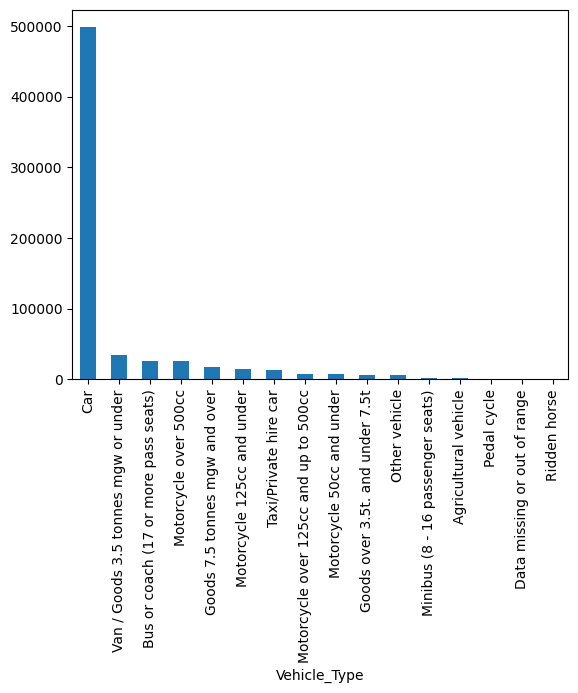

In [14]:
accident['Vehicle_Type'].value_counts().plot(kind='bar')
plt.show()

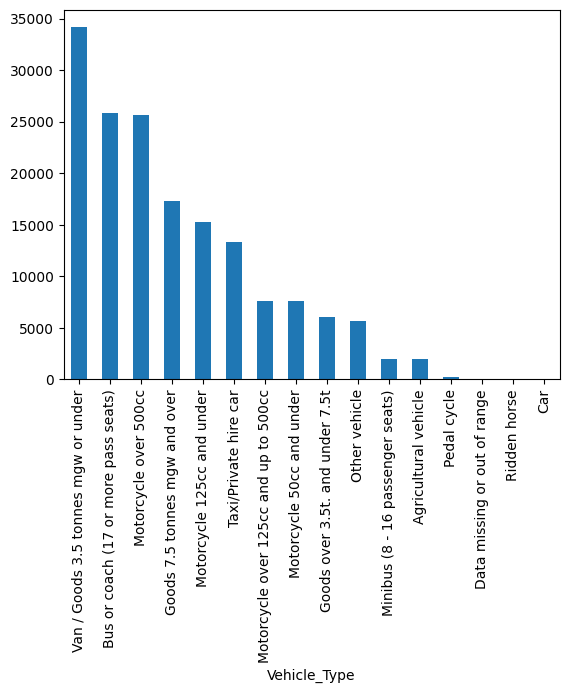

In [15]:
nocar_df = accident[accident['Vehicle_Type'] != 'Car']
nocar_df['Vehicle_Type'].value_counts().plot(kind='bar')
plt.show()
# nocar_df

<h1> <i>A Data Analysis Journey: From National Trends to Local Insights </i></h1>

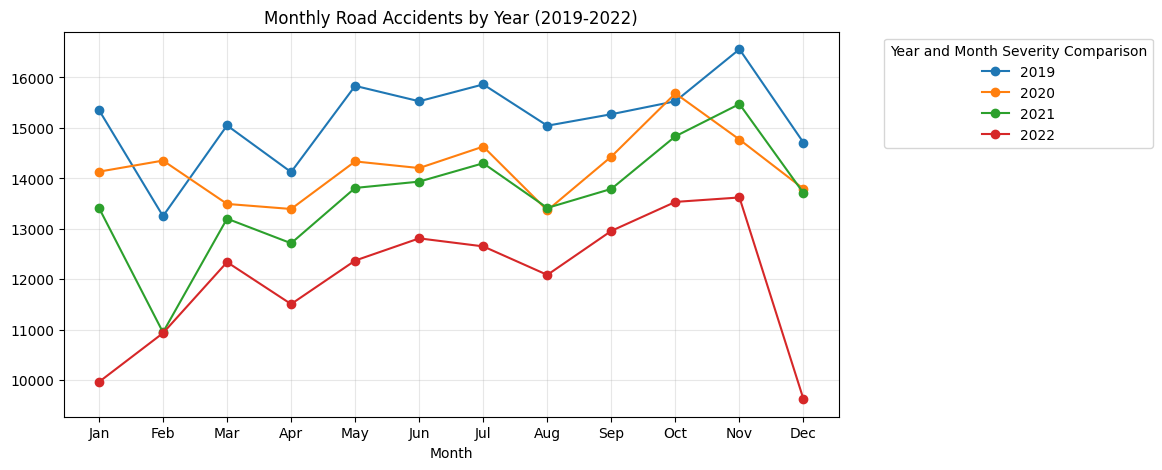

In [16]:
# 1. Group by Year FIRST, then Month (critical order!)
monthly_data = accident.groupby(['Year', 'Month']).size()

# 2. Unstack Year to create separate lines for each year
monthly_data = monthly_data.unstack(level=0)

# 3. Plot with clean formatting (only 4 lines!)
monthly_data.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Severity Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h2><i>Seasonal Analysis </i></h2>

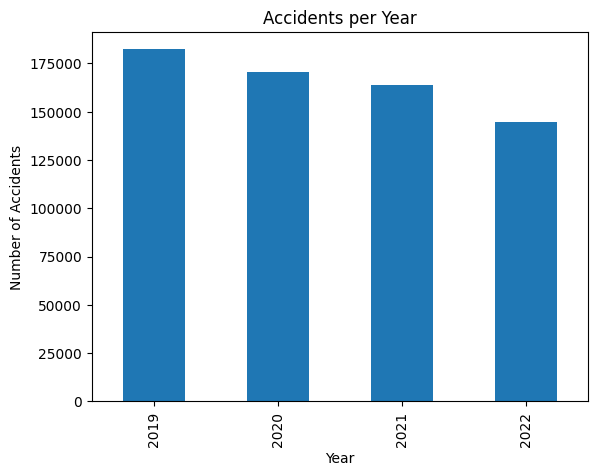

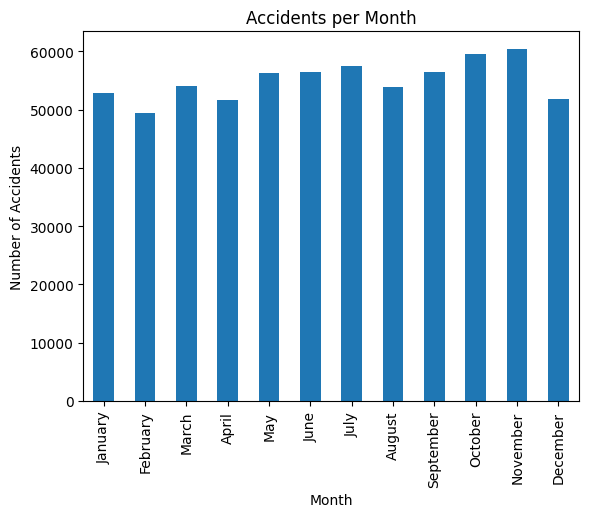

DayOfTheWeek
Monday        72680
Tuesday       94550
Wednesday     99558
Thursday      99511
Friday        97900
Saturday     107178
Sunday        89302
Name: count, dtype: int64


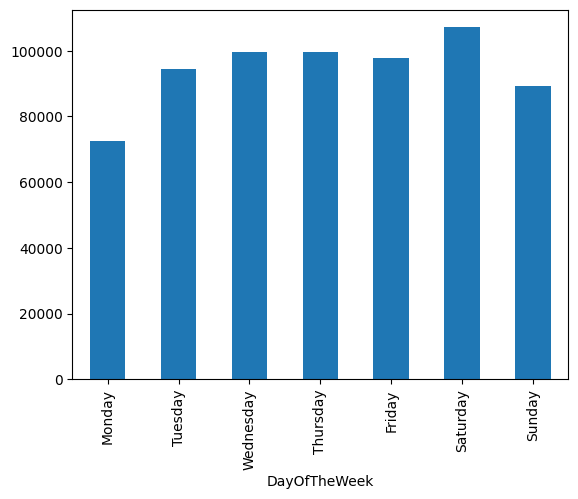

In [17]:
# Accidents per year
accidents_per_year = accident['Year'].value_counts().sort_index()
accidents_per_month = accident['Month'].value_counts().sort_index()
accidents_per_day = accident['DayOfTheWeek'].value_counts().sort_index()

#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [18]:
accidents_per_month = accident['Month'].value_counts().sort_index()
accidents_per_month

Month
1     52872
2     49491
3     54086
4     51744
5     56352
6     56481
7     57445
8     53913
9     56455
10    59580
11    60424
12    51836
Name: count, dtype: int64

<h3>Accident Severity </h3>

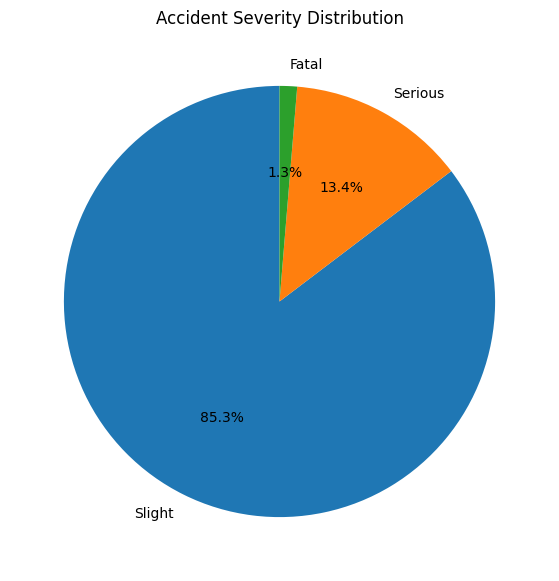

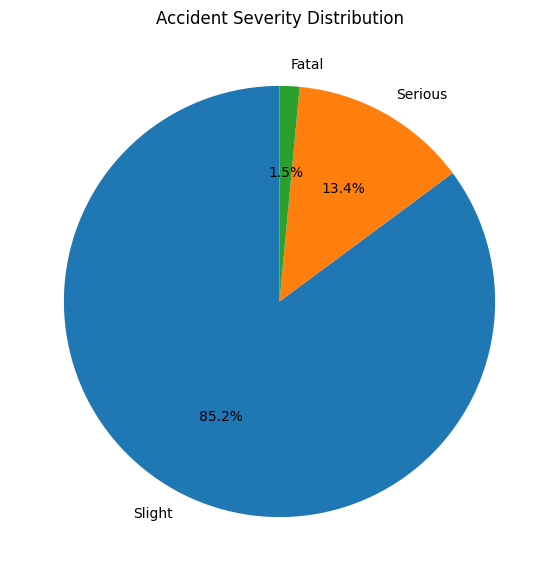

In [19]:
severity_counts = accident['Accident_Severity'].value_counts()

plt.pie(severity_counts,
        labels = severity_counts.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019 = accident[accident['Year'] == 2019]
# severity_2019
sc_2019 = severity_2019['Accident_Severity'].value_counts()

plt.pie(sc_2019,
        labels = sc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<h1>Using District Area to make a comparison to a general result </h1>
<h3>London Analysis</h3>

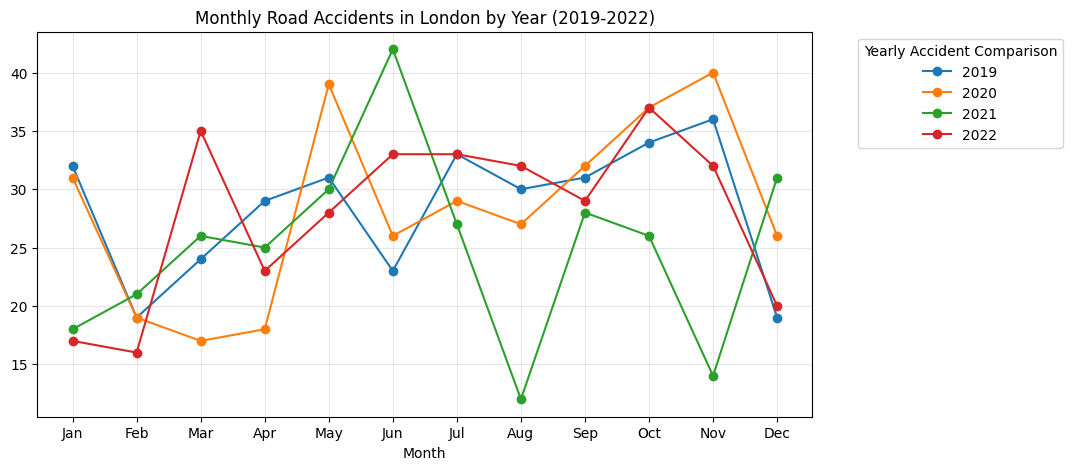

In [20]:
# df.dtypes
london_df = accident[accident['District Area'] == 'City of London']

monthly_londondata = london_df.groupby(['Year', 'Month']).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in London by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

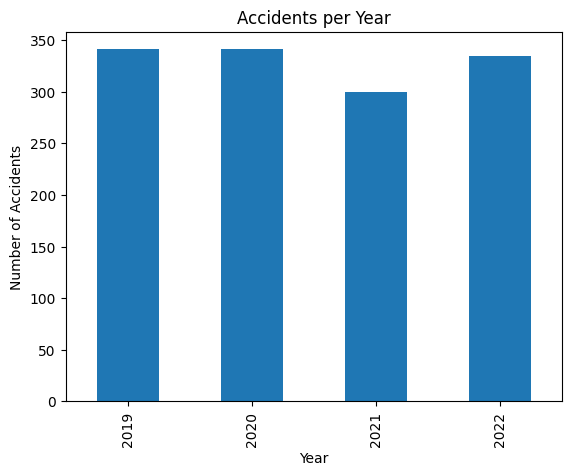

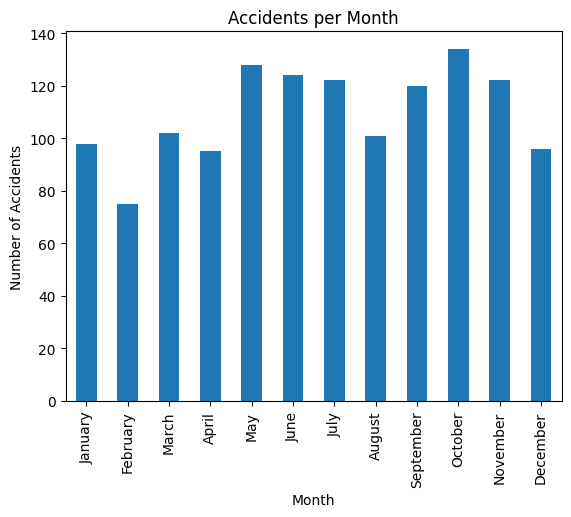

DayOfTheWeek
Monday        65
Tuesday      198
Wednesday    245
Thursday     244
Friday       249
Saturday     236
Sunday        80
Name: count, dtype: int64


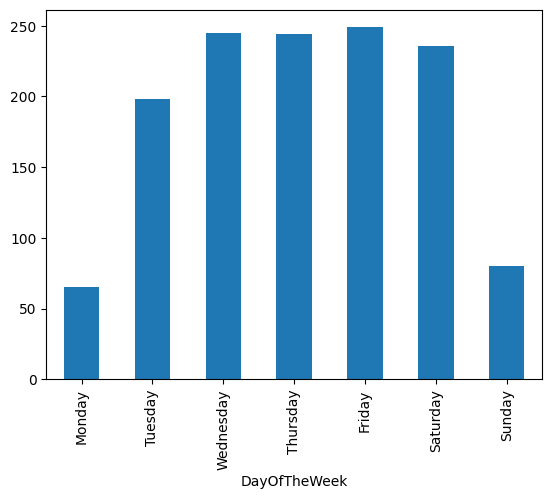

In [21]:
# Accidents per year
accidents_per_year = london_df['Year'].value_counts().sort_index()
accidents_per_month = london_df['Month'].value_counts().sort_index()
accidents_per_day = london_df['DayOfTheWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

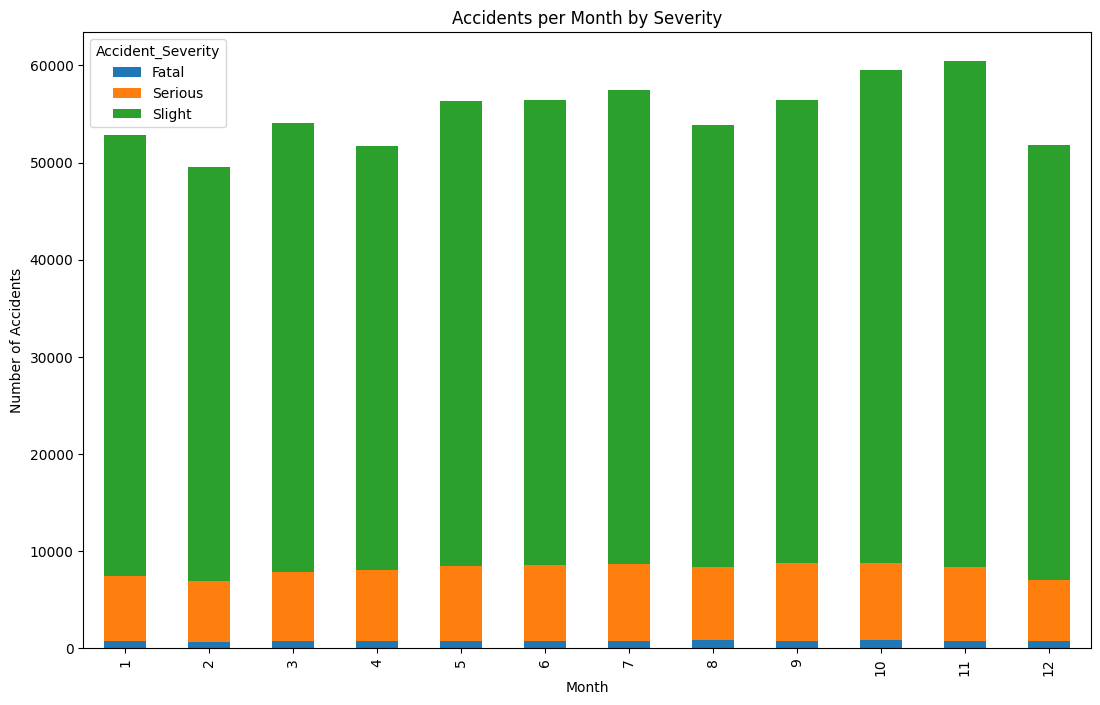

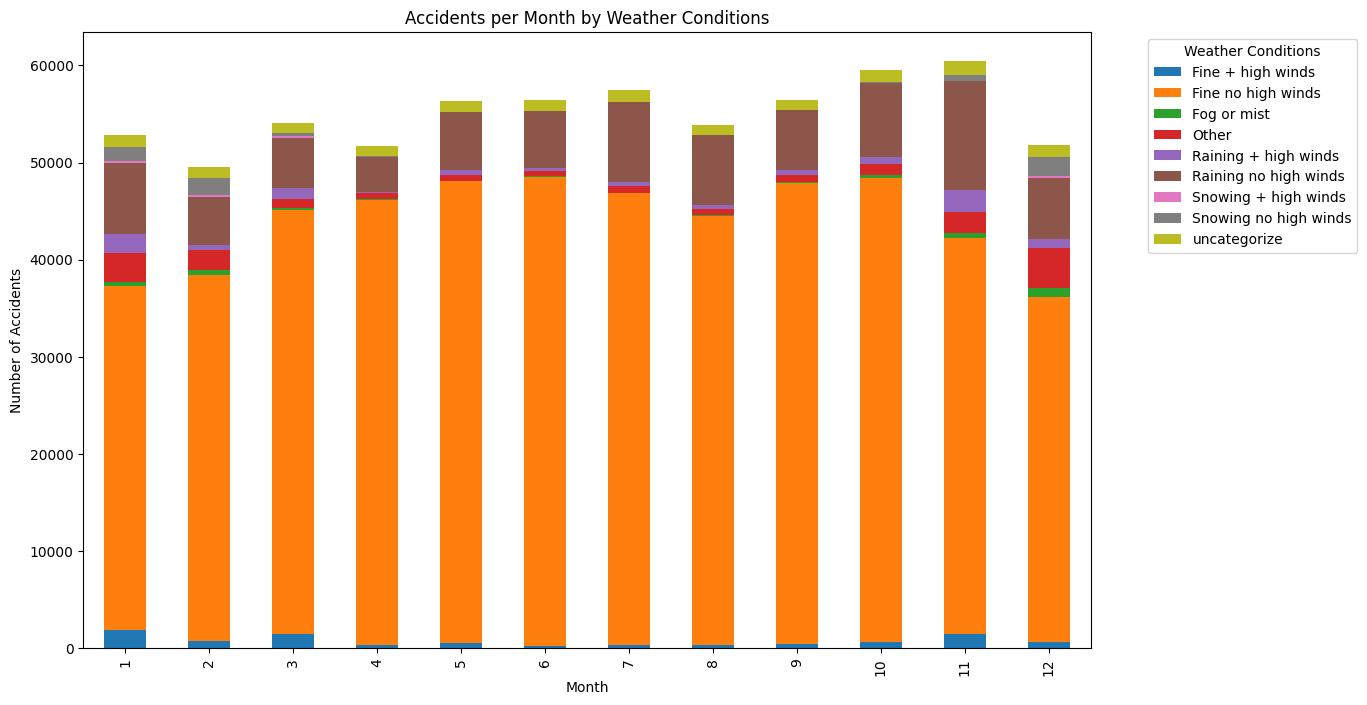

In [22]:
# Accidents per month considering severity
accidents_per_month_severity = accident.groupby(['Month', 'Accident_Severity']).size().unstack()

accidents_per_month_severity.plot(kind='bar', stacked = True)
plt.title('Accidents per Month by Severity')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()


# # Pivot table for accidents by month and weather conditions
accidents_by_month_weather = accident.pivot_table(index='Month', columns='Weather_Conditions', values='Index', aggfunc='count')

accidents_by_month_weather.plot(kind='bar', stacked=True)
plt.title('Accidents per Month by Weather Conditions')
plt.xlabel('Month')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

<h4><i>Accident Severity in London</i></h4>

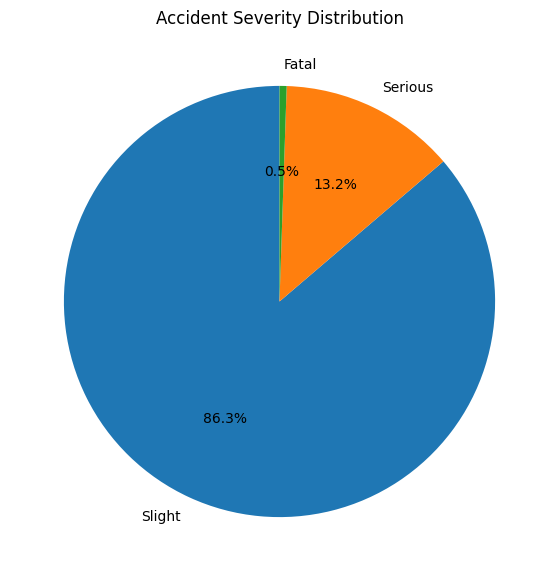

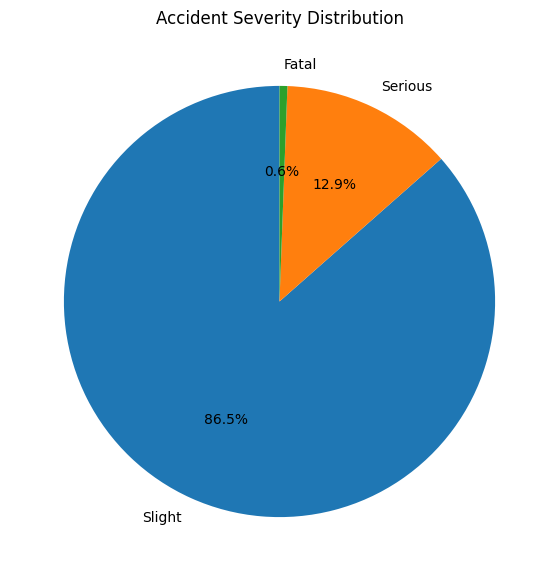

In [23]:
severity_london  = london_df['Accident_Severity'].value_counts()

plt.pie(severity_london,
        labels = severity_london.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_london = london_df[london_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_london['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

In [24]:
# Step 1: Extract latitude and longitude from the DataFrame
#convert data into a tuple and then to a list 
locations = list(zip(london_df['Latitude'],london_df['Longitude']))

# Step 2: Create a base map centered on a specific location
# You can adjust the center and zoom level based on your data
m = folium.Map(location=[london_df['Latitude'].mean(), london_df['Longitude'].mean()], zoom_start=10)

# Step 3: Add the heatmap layer
HeatMap(locations).add_to(m)

# Step 4: Save or display the map
m.save('london_heatmap.html')  # Save the map as an HTML file
m  # Display the map in a Jupyter Notebook

<hr><h1>QUESTIONS</h1><hr>

<h2>Q1. Which District areas have the highest number of accidents?</h2>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Birmingham'),
  Text(1, 0, 'Leeds'),
  Text(2, 0, 'Manchester'),
  Text(3, 0, 'Bradford'),
  Text(4, 0, 'Sheffield')])

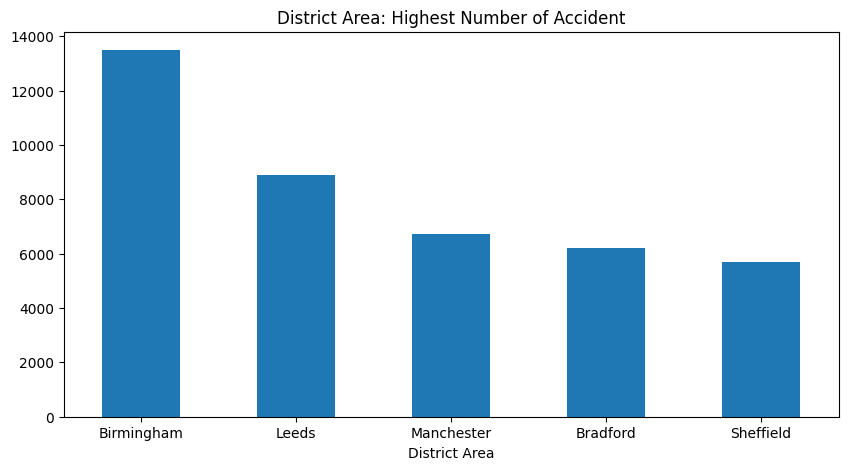

In [25]:
accident['District Area'].value_counts().head().plot(kind='bar', figsize=(10, 5))
plt.title('District Area: Highest Number of Accident')
plt.xticks(rotation=0)

<h3>INSIGHT : Birmingham have the highest number of accidents.</h3>

<h2>Q2. Which District areas have the lowest number of accidents?</h2>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Clackmannanshire'),
  Text(1, 0, 'Orkney Islands'),
  Text(2, 0, 'Shetland Islands'),
  Text(3, 0, 'Teesdale'),
  Text(4, 0, 'Berwick-upon-Tweed')])

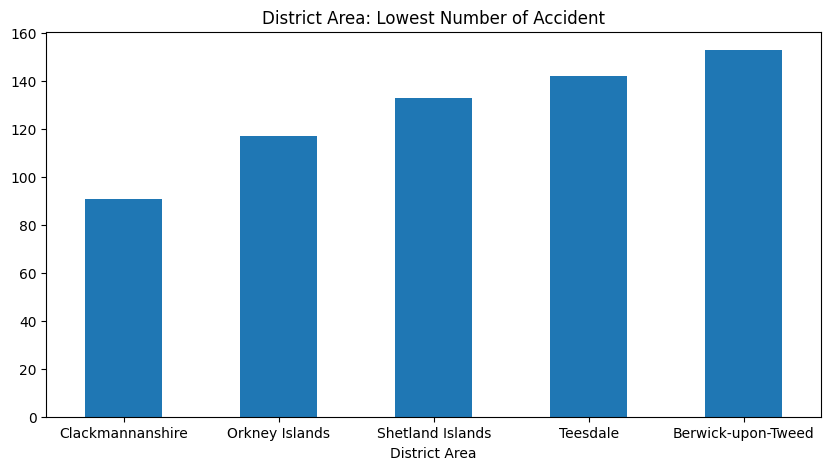

In [26]:
accident['District Area'].value_counts().tail().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('District Area: Lowest Number of Accident')
plt.xticks(rotation=0)

<h3>INSIGHT : Clackmannanshire have the lowest number of accidents.</h3>

<h2>Q3. What are the top 10 District most accident-prone areas?</h2>

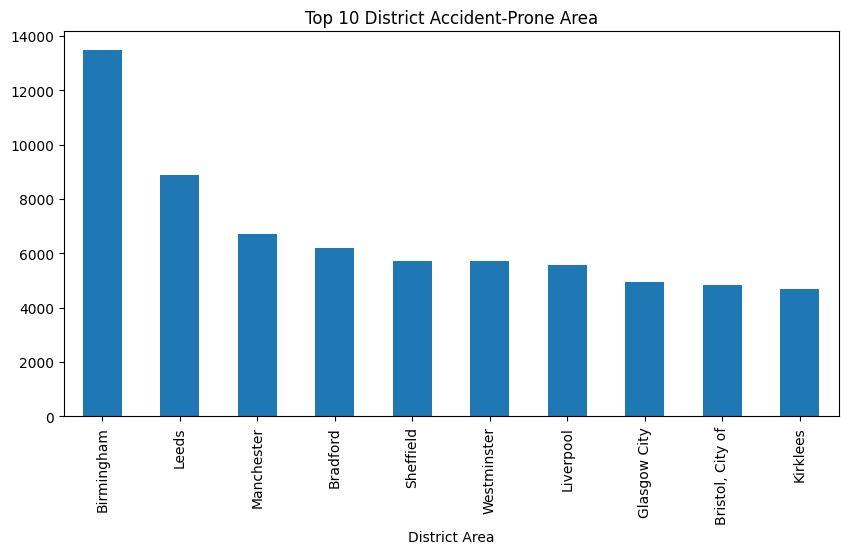

In [27]:
accident['District Area'].value_counts().head(10).plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 District Accident-Prone Area')
plt.show()

<h3>INSIGHT : The Birmingham, Leeds, Manchester, Bradford, Westminster, Liverpool, Glasgow City, City of Bristol & Kirklees are the Top 10 Most Prone District to Accident.</h3>

<h2>Q4. Which District Area have the highest average casualty counts per accident?</h2>

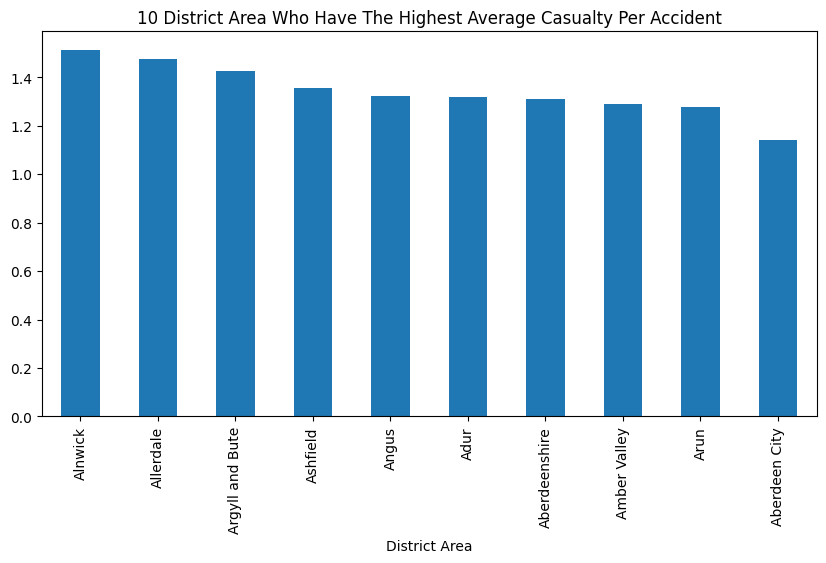

In [28]:
accident.groupby('District Area')['Number_of_Casualties'].mean().head(10).sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('10 District Area Who Have The Highest Average Casualty Per Accident')
plt.show()

<h3>INSIGHT : The District Area of Alnwick have the Highest Average Casualty counts per Accident.</h3> 

<h2>Q5. Are certain districts more prone to multi-vehicle collisions?</h2>

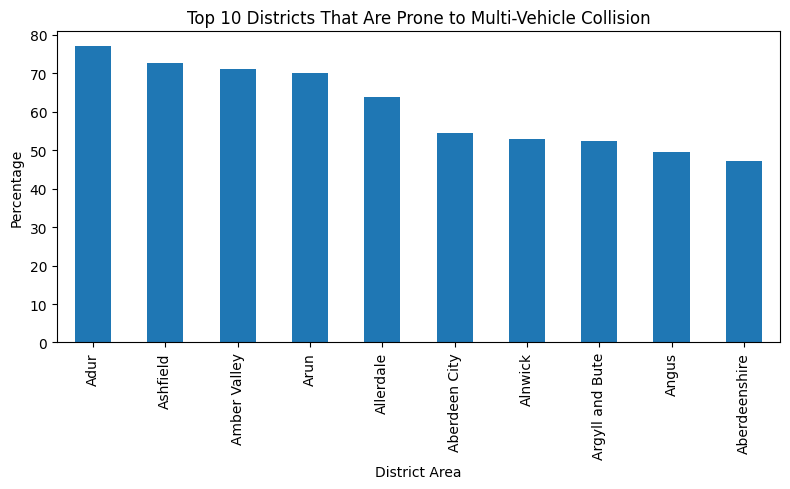

In [29]:
accident['multi_vehicle'] = accident['Number_of_Vehicles']>=2

multi_vehicle_byDistrict = accident.groupby('District Area')['multi_vehicle'].mean().head(10).sort_values(ascending=False)*100
multi_vehicle_byDistrict.plot(kind='bar', figsize=(8,5))
plt.title('Top 10 Districts That Are Prone to Multi-Vehicle Collision')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

<h3>INSIGHT : Yes, they are certain district that are prone to a multi-vehicle collision. Top of them is the District of Adur.</h3>

<h2>Q6. Are multi-vehicle accidents more likely to result in fatal casualties?</h2>

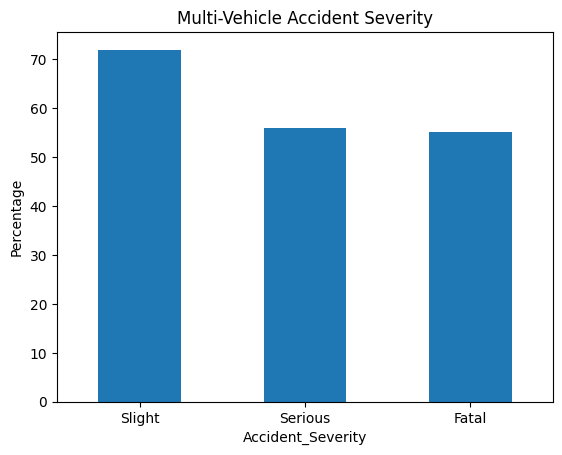

In [30]:
accident['multi_vehicle'] = accident['Number_of_Vehicles']>=2

multi_vehicle_accident = accident.groupby('Accident_Severity')['multi_vehicle'].mean().sort_values(ascending=False)*100
multi_vehicle_accident.plot(kind='bar')
plt.title('Multi-Vehicle Accident Severity')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

<h3>INSIGHT : No, Multi-Vehicle Accidents are more likely to result in Slight Casualties.</h3>

<h2>Q7. What are the average number of vehicles involved per accident by severity?</h2>

Accident_Severity
Slight     1.86
Fatal      1.79
Serious    1.68
Name: Number_of_Vehicles, dtype: float64


(array([0, 1, 2]),
 [Text(0, 0, 'Slight'), Text(1, 0, 'Fatal'), Text(2, 0, 'Serious')])

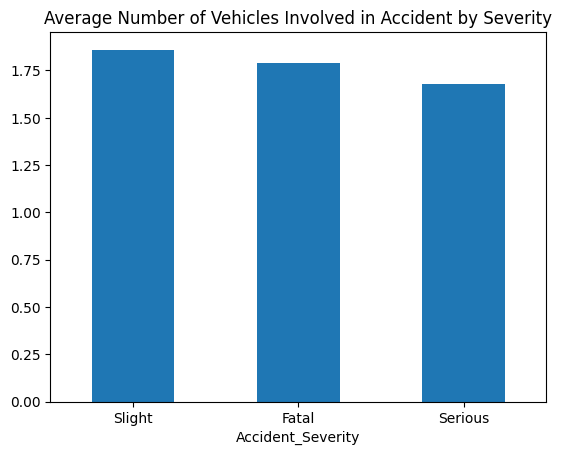

In [31]:
ave_num = accident.groupby('Accident_Severity')['Number_of_Vehicles'].mean().round(2).sort_values(ascending=False)
ave_num.plot(kind='bar')
print(ave_num)
plt.title('Average Number of Vehicles Involved in Accident by Severity')
plt.xticks(rotation=0)

<h3>Insight : The Average number of vehicles involved per accident with Slight Severity is 1.86, with Fatal Severity is 1.79, with Serious Severity is 1.67.</h3>

<h2>Q8. What proportion of accidents involve only one vehicle vs multiple vehicle?</h2>

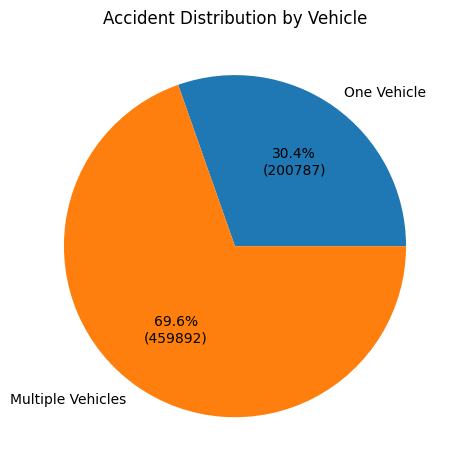

In [32]:
labels = ['One Vehicle', 'Multiple Vehicles']

one_vehicle_count = accident[accident['Number_of_Vehicles'] == 1].shape[0]
multi_vehicle_count = accident[accident['Number_of_Vehicles'] >= 2].shape[0]

sizes = [one_vehicle_count, multi_vehicle_count]

def format_label(pct):
    total = sum(sizes)
    absolute = int(round(pct / 100 * total))
    return f"{pct:.1f}%\n({absolute})"

plt.pie(sizes, labels=labels, autopct=format_label)
plt.title('Accident Distribution by Vehicle')
plt.tight_layout()
plt.show()

<h3>INSIGHT : The Proportion of Multi-Vehicles involved in accident is 69.6%. Much larger than the 30.4% Proportion of One-Vehicle involved in Accident.</h3>

<h2>Q9. Which type of vehicle is the most frequent to be involved in accidents?</h2>

<function matplotlib.pyplot.show(close=None, block=None)>

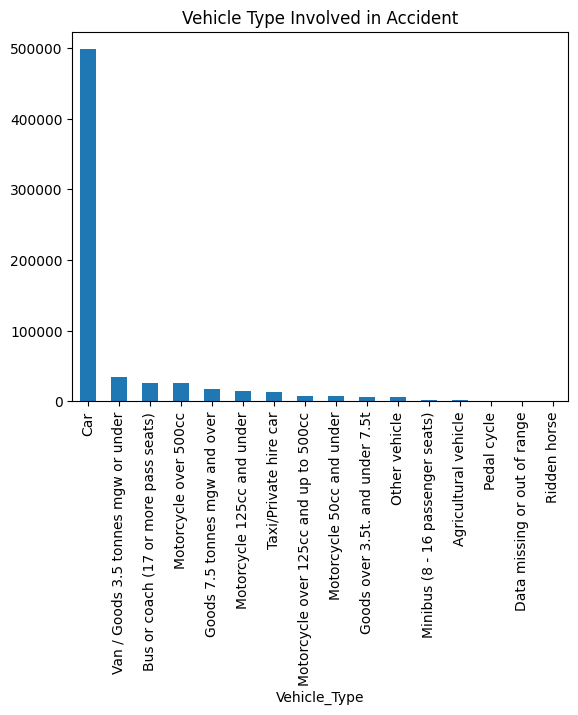

In [33]:
accident['Vehicle_Type'].value_counts().plot(kind='bar')
plt.title('Vehicle Type Involved in Accident')
plt.show

<h3>INSIGHT : Car is the vehicle type that is most frequent to be involved in accidents.</h3>

<h2>Q10. Which vehicle type are most associated with fatal accidents?</h2>

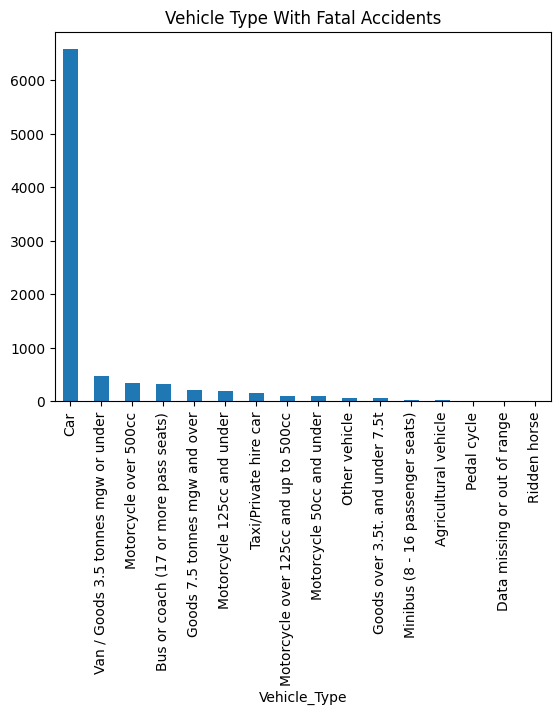

In [34]:
accident_level = accident[accident['Accident_Severity']=='Fatal']

fatal_counts =accident_level['Vehicle_Type'].value_counts().plot(kind='bar')
plt.title('Vehicle Type With Fatal Accidents')
plt.show()

<h3>INSIGHT : The Vehicle 'CAR' are most associated with Fatal Accidents.</h3>

<h2>Q11. What Accident Severity are most common to happen in Urban & Rural Area?</h2>

Accident_Severity
Slight     367714
Serious     50904
Fatal        3060
Name: count, dtype: int64
Accident_Severity
Slight     196077
Serious     37312
Fatal        5601
Name: count, dtype: int64


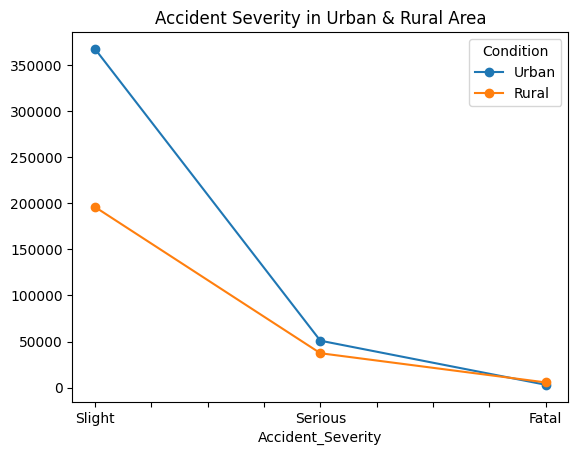

In [35]:
urban_area = accident[accident['Urban_or_Rural_Area']=='Urban']
rural_area = accident[accident['Urban_or_Rural_Area']=='Rural']

urban_fatal_counts =urban_area['Accident_Severity'].value_counts()
rural_fatal_counts =rural_area['Accident_Severity'].value_counts()

print(urban_fatal_counts)
print(rural_fatal_counts)

urban_fatal_counts.plot(marker='o')
rural_fatal_counts.plot(marker='o')

legend_labels=['Urban', 'Rural']
plt.legend(legend_labels, title='Condition', loc='best')

plt.title('Accident Severity in Urban & Rural Area')
plt.xticks(rotation=0)
plt.show()

<h3>INSIGHT : We can see that Accidents with Slight Severity are more likely to happen in the Urban Area.</h3>

<h2>Q12. Are accidents more common in urban or rural areas?</h2>

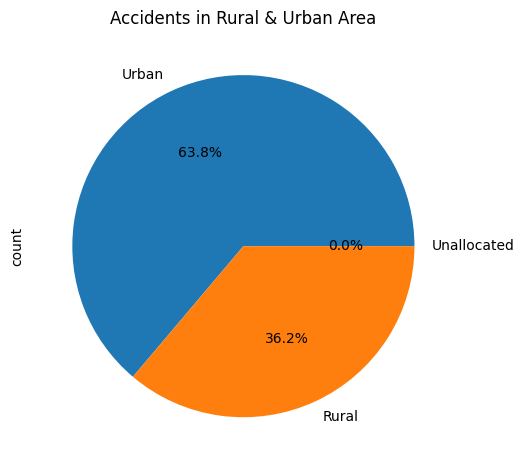

In [36]:
accident['Urban_or_Rural_Area'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Accidents in Rural & Urban Area')
plt.tight_layout()

<h3>INSIGHT : Accidents are more common in Urban area.</h3>

<h2>Q13. Do Urban areas experience more Fatal accidents compared to Rural areas?</h2>

(array([], dtype=float64), [])

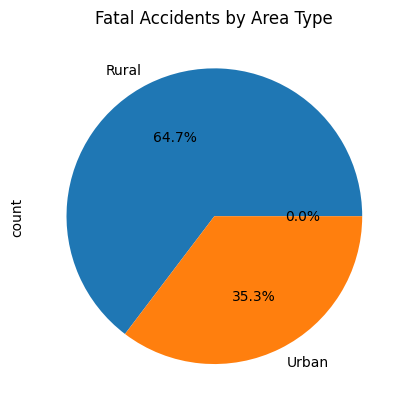

In [37]:
accident_level = accident[accident['Accident_Severity']=='Fatal']

fatal_counts =accident_level['Urban_or_Rural_Area'].value_counts()
fatal_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Fatal Accidents by Area Type')
plt.xticks(rotation=0)

<h3>INSIGHT : We can see that there are more Fatal Accidents in the Rural Area.</h3>

<h2>Q14. What weather condition are common in Urban Area and in Rural Area?</h2>

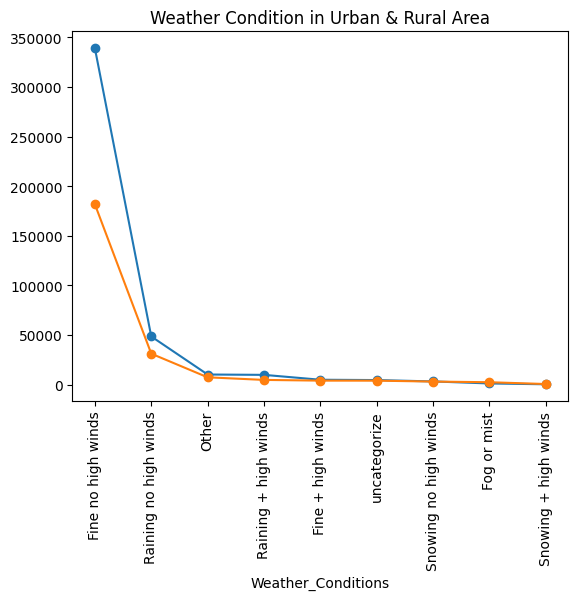

In [38]:
accident_loc = accident[accident['Urban_or_Rural_Area']=='Urban']
accident_loc['Weather_Conditions'].value_counts().plot(marker='o')

accident_loc = accident[accident['Urban_or_Rural_Area']=='Rural']
accident_loc['Weather_Conditions'].value_counts().plot(marker='o')

plt.title('Weather Condition in Urban & Rural Area')
plt.xticks(rotation=90)
plt.show()

<h3>INSIGHT : 'Fine no high winds' are the common weather for BOTH Urban & Rural Area when accident happens.</h3>

<h2>Q15. What weather condition/s much affect accident severity?</h2>

Text(0.5, 1.0, 'Weather Condition by Severity')

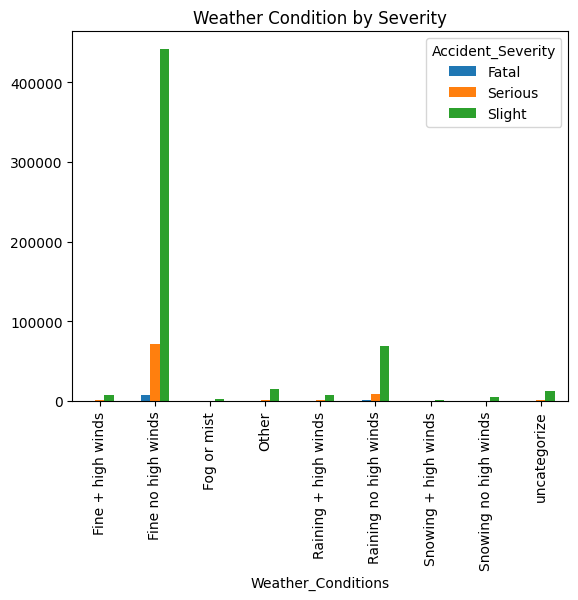

In [39]:
accident.groupby(['Weather_Conditions','Accident_Severity']).size().unstack().plot(kind='bar')
plt.title('Weather Condition by Severity')

<h3>INSIGHT : Based on the graph, we can see that in the weather condition 'Fine no high winds' have the most accidents in severity of slight, serious, & fatal. </h3>

<h2>Q16. Which light conditions are most associated with fatal accidents?</h2>

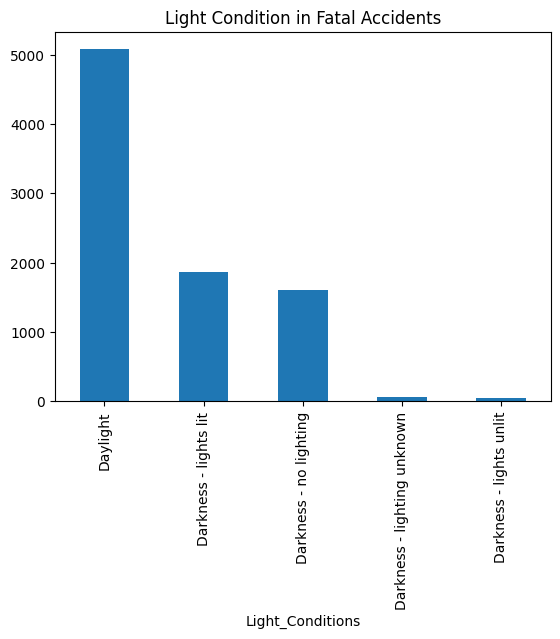

In [40]:
accident_level = accident[accident['Accident_Severity']=='Fatal']
accident_level['Light_Conditions'].value_counts().plot(kind='bar')
plt.title('Light Condition in Fatal Accidents')
plt.show()

<h3>INSIGHT : During Daylight, Accident with Fatal severity often happens.</h3>

<h2>Q17. What road surface condition significantly correlate with accident frequency?</h2>

Text(0.5, 1.0, 'Road Surface Condition')

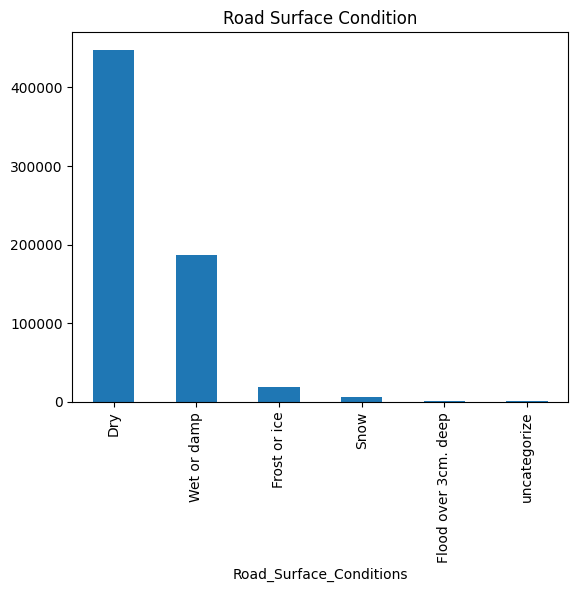

In [41]:
accident['Road_Surface_Conditions'].value_counts().plot(kind='bar')
plt.title('Road Surface Condition')

<h3>INSIGHT : There are more accidents in a DRY SURFACE.</h3>

<h2>Q18. What road type/s have impact severity?</h2>

<Axes: xlabel='Road_Type'>

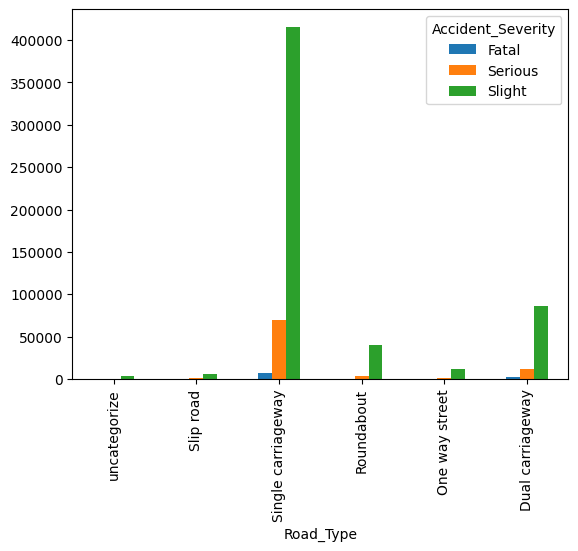

In [42]:
accident.groupby(['Road_Type','Accident_Severity']).size().unstack().sort_values(by='Road_Type', ascending=False).plot(kind='bar')

<h3>INSIGHT : Most accident happen in Single Carriageway Road Type.</h3>

<h2>Q19. Is there a difference in severity between daylight accidents during rain vs. darkness accidents during rain?</h2>

Text(0.5, 1.0, 'Accident Severity in Rain during Daylight & Darkness')

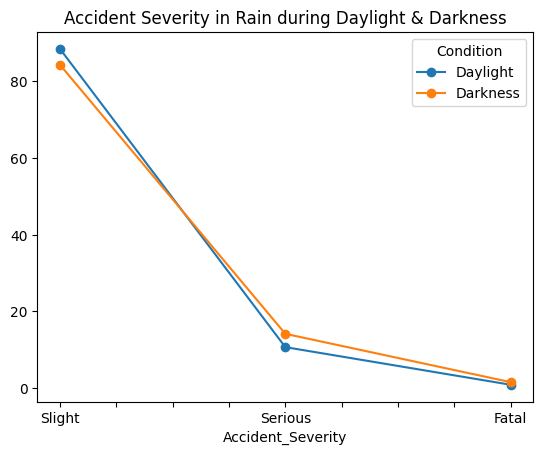

In [43]:
rain_acc = accident[accident['Weather_Conditions'].str.contains("Rain",case=False, na=False)]

rain_day = rain_acc[rain_acc['Light_Conditions'].str.contains("Daylight",case=False, na=False)]
rain_dark = rain_acc[rain_acc['Light_Conditions'].str.contains("Darkness",case=False, na=False)]

severe_day = rain_day['Accident_Severity'].value_counts(normalize=True)*100
severe_dark = rain_dark['Accident_Severity'].value_counts(normalize=True)*100

severe_day.plot(marker='o')
severe_dark.plot(marker='o')

legend_labels=['Daylight', 'Darkness']
plt.legend(legend_labels, title='Condition', loc='best')
plt.title('Accident Severity in Rain during Daylight & Darkness')

<h3>INSIGHT : There is, but not much.</h3>

<h2>Q20. What combination of weather, road surface, and light conditions have the highest accident risk?</h2>

In [44]:
accident.groupby(['Weather_Conditions','Road_Surface_Conditions','Light_Conditions']).size().sort_values(ascending=False).unstack()

Light_Conditions                               Darkness - lighting unknown  \
Weather_Conditions    Road_Surface_Conditions                                
Fine + high winds     Dry                                               29   
                      Flood over 3cm. deep                               2   
                      Frost or ice                                       3   
                      Snow                                               0   
                      Wet or damp                                       25   
                      uncategorize                                       0   
Fine no high winds    Dry                                             2927   
                      Flood over 3cm. deep                               0   
                      Frost or ice                                     128   
                      Snow                                              12   
                      Wet or damp                                      615   
                      uncategorize                                       1   
Fog or mist           Dry                                                8   
                      Flood over 3cm. deep                               0   
                      Frost or ice                                      13   
                      Snow                                               0   
                      Wet or damp                                       44   
                      uncategorize                                       0   
Other                 Dry                                               24   
                      Flood over 3cm. deep                               1   
                      Frost or ice                                      57   
                      Snow                                               7   
                      Wet or damp                                       97   
                      uncategorize                                       0   
Raining + high winds  Dry                                                1   
                      Flood over 3cm. deep                               4   
                      Frost or ice                                       1   
                      Snow                                               0   
                      Wet or damp                                      105   
                      uncategorize                                       0   
Raining no high winds Dry                                                3   
                      Flood over 3cm. deep                               5   
                      Frost or ice                                       1   
                      Snow                                               0   
                      Wet or damp                                      612   
                      uncategorize                                       0   
Snowing + high winds  Dry                                                0   
                      Flood over 3cm. deep                               0   
                      Frost or ice                                       3   
                      Snow                                              11   
                      Wet or damp                                        1   
                      uncategorize                                       0   
Snowing no high winds Dry                                                2   
                      Flood over 3cm. deep                               0   
                      Frost or ice                                      12   
                      Snow                                              66   
                      Wet or damp                                       14   
                      uncategorize                                       0   
uncategorize          Dry                                             1402   
                      

📌 Highest risk combination: Fine no high winds | Dry | Daylight with 341493 accidents


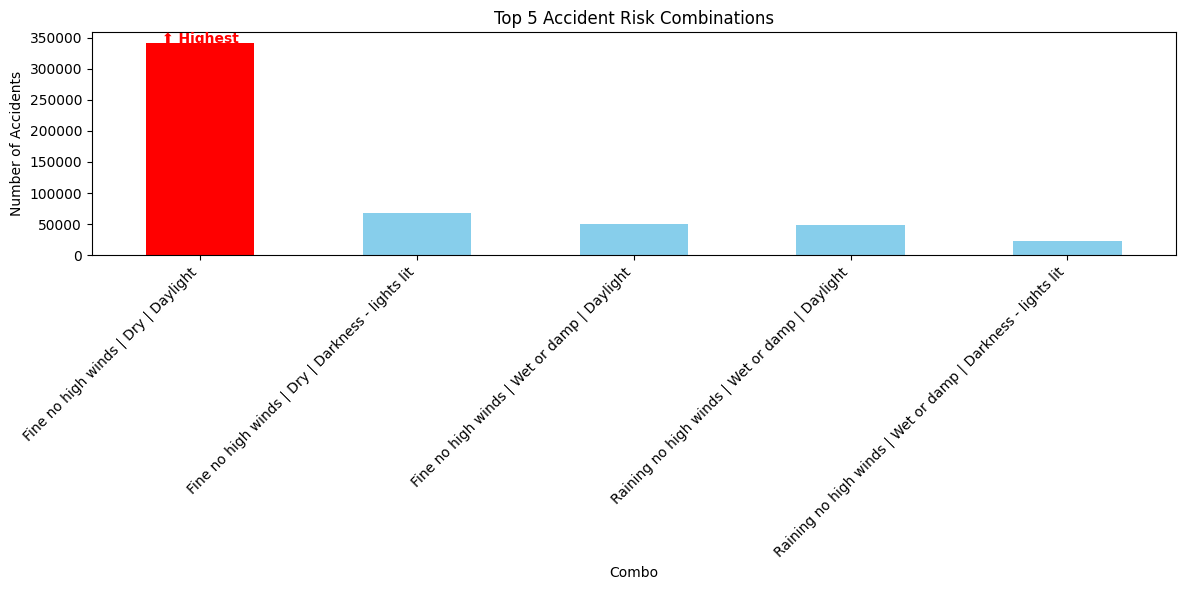

In [45]:
combi = (accident.groupby(['Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions']).size().sort_values(ascending=False))
combi_df = combi.reset_index(name='Accident_Count')

combi_df['Combo'] = (combi_df['Weather_Conditions'].astype(str) + " | " + 
                     combi_df['Road_Surface_Conditions'].astype(str) + " | " +
                     combi_df['Light_Conditions'].astype(str))

max_row = combi_df.loc[combi_df['Accident_Count'].idxmax()]
max_value = max_row['Accident_Count']
max_combo = max_row['Combo']

print("📌 Highest risk combination:", max_combo, "with", max_value, "accidents")

top5 = combi_df.head()

colors = ['red' if val == max_value else 'skyblue' for val in top5['Accident_Count']]

top5.plot(kind='bar', x='Combo', y='Accident_Count', figsize=(12,6), color=colors, legend=False)

plt.title("Top 5 Accident Risk Combinations")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha='right')
plt.text(top5.index[top5['Accident_Count'].idxmax()], max_value + 100, "⬆ Highest", ha='center', color='red', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

<h3>INSIGHT : We can see that "Fine no high winds | Dry | Daylight" has the highest accident record. So we can consider it as accident risk.</h3>

<h2>Q21. How many accidents occurred per year? Is there a trend, Increasing or Decreasing?</h2>

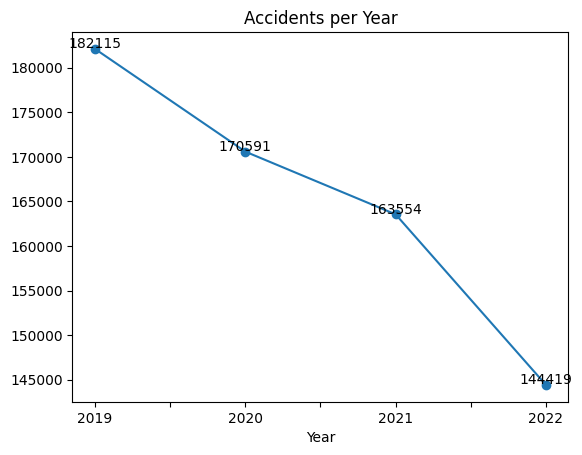

In [46]:
acc_year=accident['Year'].value_counts()
acc_year.plot(marker='o')
plt.title('Accidents per Year')

for i, v in enumerate(acc_year):
    plt.text(i, v + 100, str(v), ha='center', fontsize=10)

<h3>INSIGHT : Accident in 2019 is 182115. In 2020, 170591. In 2021, 163554. In 2022, 144419. We can see that the accidents over the years are decreasing.</h3>

<h2>Q22. Is there a trend in the average number of casualties per accident over the years?</h2>

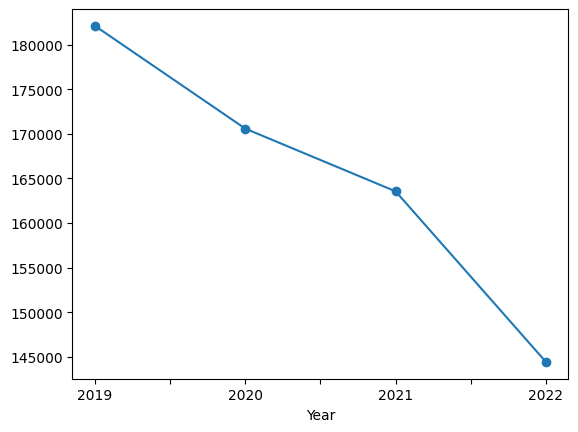

In [47]:
accident['Year'].value_counts().sort_index().plot(marker='o')
plt.show()

<h3>INSIGHT : We can see at the graph that the number of casualties from 2019 decrease. It goes up again by the Year 2020. Then it decreases by the Year 2021. For comparison, The Year 2022 is much less than the Year 2019.</h3>

<h2>Q23. Which months have the highest & lowest number of accidents?</h2>

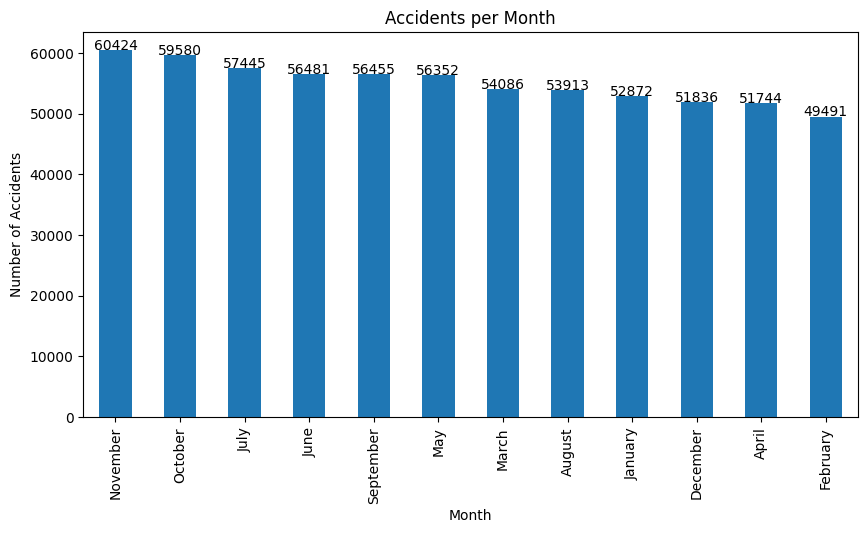

In [48]:
accidents_per_month = accident['Month'].value_counts()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)

for i, v in enumerate(accidents_per_month):
    plt.text(i, v + 100, str(v), ha='center', fontsize=10)

accidents_per_month.plot(kind='bar', figsize=(10,5))
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

<h3>INSIGHT : NOVEMBER is the month that have the Highest Accident record. FEBRUARY is the month that have the Lowest Accident record.</h3>

<h2>Q24. What is the average number of accidents per day across the dataset?</h2>

In [49]:
accident['Day'].mean().round()

np.float64(16.0)

<h3>INSIGHT : The average number of accident per day is 16 rounded off.</h3>

<h2>Q25. On what days of the week are accidents most frequent?</h2>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '1'),
  Text(1, 0, '12'),
  Text(2, 0, '11'),
  Text(3, 0, '5'),
  Text(4, 0, '10'),
  Text(5, 0, '9'),
  Text(6, 0, '17'),
  Text(7, 0, '23'),
  Text(8, 0, '6'),
  Text(9, 0, '16'),
  Text(10, 0, '19'),
  Text(11, 0, '8'),
  Text(12, 0, '20'),
  Text(13, 0, '15'),
  Text(14, 0, '13'),
  Text(15, 0, '2'),
  Text(16, 0, '18'),
  Text(17, 0, '4'),
  Text(18, 0, '21'),
  Text(19, 0, '22'),
  Text(20, 0, '3'),
  Text(21, 0, '14'),
  Text(22, 0, '7'),
  Text(23, 0, '24'),
  Text(24, 0, '26'),
  Text(25, 0, '27'),
  Text(26, 0, '28'),
  Text(27, 0, '29'),
  Text(28, 0, '25'),
  Text(29, 0, '30'),
  Text(30, 0, '31')])

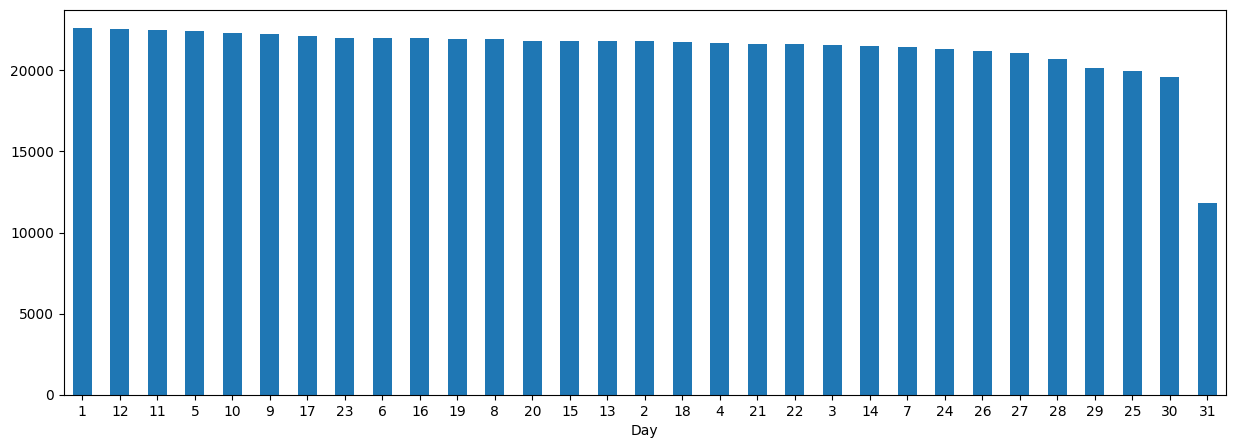

In [50]:
accident['Day'].value_counts().plot(kind="bar",figsize=(15,5))
plt.xticks(rotation = 0)

<h3>INSIGHT : Based on the graph, Day 1 is where the most accident happen.</h3>

<h2>26. Accidents are more frequent during Weekday or Weekend?</h2>

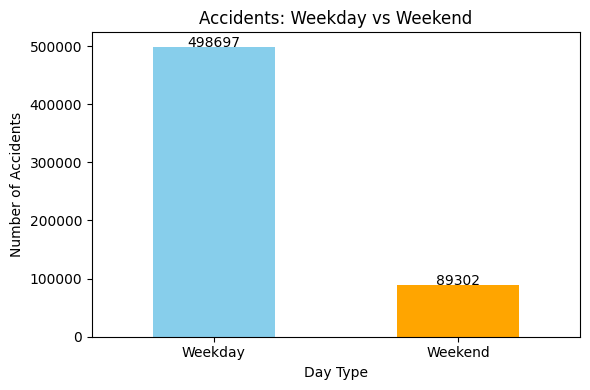

In [51]:
week_map = {1: 'Weekday',2: 'Weekday',3: 'Weekday',4: 'Weekday',5: 'Weekday',
            6: 'Weekend',7: 'Weekend'}

accident['Day_Type'] = accident['DayOfTheWeek'].map(week_map)
day_type_counts = accident['Day_Type'].value_counts()
day_type_counts.plot(kind="bar", color=["skyblue", "orange"], figsize=(6,4))

plt.title("Accidents: Weekday vs Weekend")
plt.xlabel("Day Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)

for i, v in enumerate(day_type_counts):
    plt.text(i, v + 100, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

<h3>INSIGHT : Weekdays have the most accident record than Weekends.</h3>

<hr><h1>27-32. DISTRICT AREA</h1>

In [52]:
# for i in accident['District Area'].unique():
#     print(i)

<h2>27. Westminster</h2>

In [53]:
Westminster_df = accident[accident['District Area'] == 'Westminster']
Westminster_locations  = list(zip(Westminster_df['Latitude'], Westminster_df['Longitude']))
Westminster_map = folium.Map(location=[Westminster_df['Latitude'].mean(), Westminster_df['Longitude'].mean()], zoom_start=10)
HeatMap(Westminster_locations).add_to(Westminster_map)
Westminster_map.save('bolton_heatmap.html')  
Westminster_map

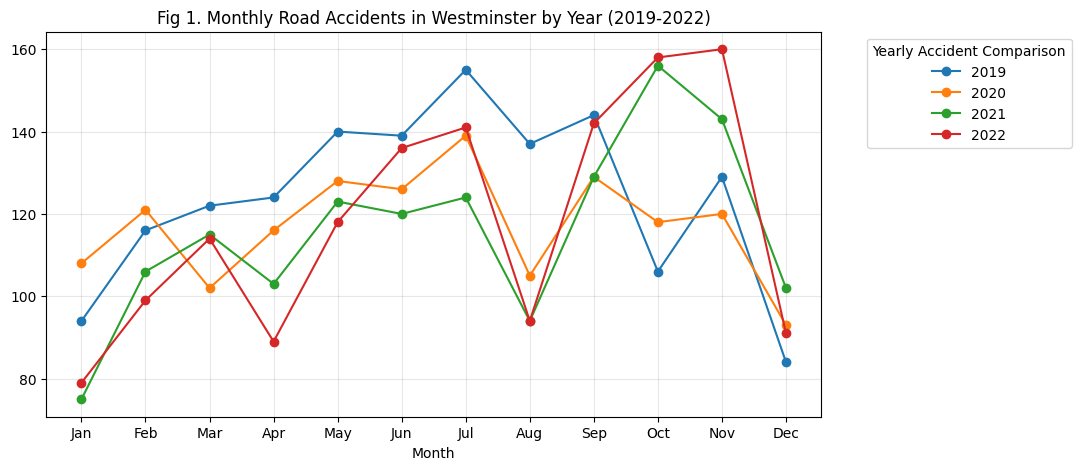

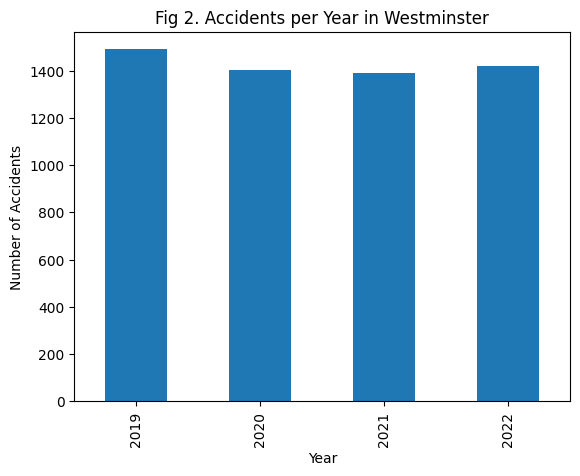

Year
2019    1490
2020    1405
2021    1390
2022    1421
Name: count, dtype: int64


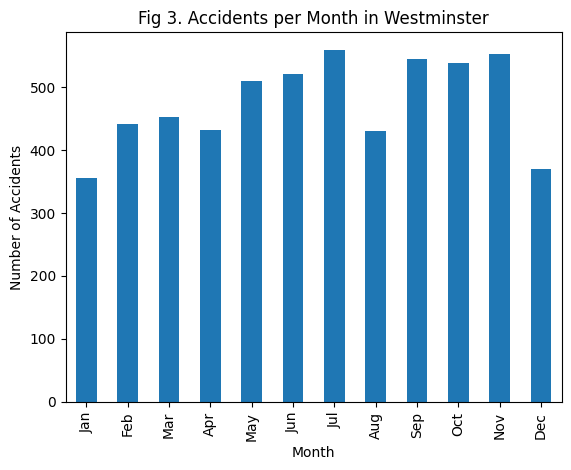

Month
1     356
2     442
3     453
4     432
5     509
6     521
7     559
8     430
9     544
10    538
11    552
12    370
Name: count, dtype: int64


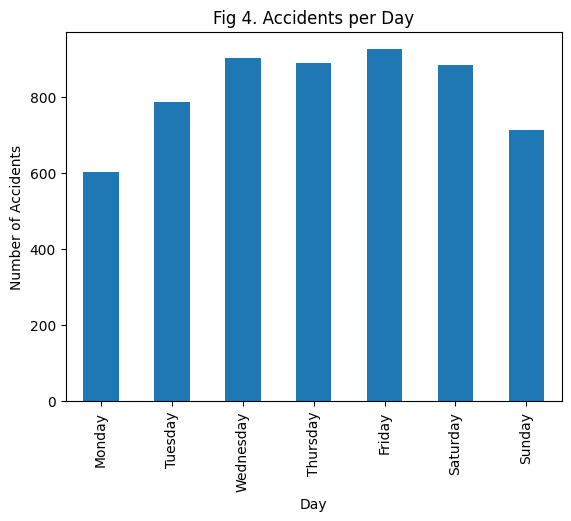

DayOfTheWeek
0    603
1    786
2    902
3    890
4    926
5    885
6    714
Name: count, dtype: int64


In [54]:
monthly_Westminsterdata = Westminster_df.groupby(['Year', 'Month']).size()

monthly_Westminsterdata = monthly_Westminsterdata.unstack(level=0)

monthly_Westminsterdata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Fig 1. Monthly Road Accidents in Westminster by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# Accidents per year
accidents_per_year = Westminster_df['Year'].value_counts().sort_index()

#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Fig 2. Accidents per Year in Westminster')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()
print(accidents_per_year)

#per Month
accidents_per_month = Westminster_df['Month'].value_counts().sort_index()
accidents_per_month.plot(kind='bar')
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Fig 3. Accidents per Month in Westminster')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()
print(accidents_per_month)

#accident per day
accidents_per_day = Westminster_df['DayOfTheWeek'].value_counts().sort_index()
accidents_per_day.plot(kind='bar')
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Fig 4. Accidents per Day')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()
print(accidents_per_day)

<hr>
<h3>INSIGHTS : Fig 1. Monthly Road Accidents in Westminster by Year (2019-2022)</h3>
<h3>In the Year 2019 & 2020, Accidents mostly happen in the Month of July.<br>
    In the Year 2021, Accidents mostly happen in the month of October.<br>
    In the Year 2022, Accidents mostly happen in the month of November.<br><br>
    From the year 2019 to 2022, The Year 2022 got the month who have the highest recorded accidents.<br>
    From the year 2019 to 2022, The Year 2021 got the month who have the lowest recorded accident.</h3>
<hr>
<h3>INSIGHTS : Fig 2. Accidents per Year in Westminster</h3>
<h3>The Year 2019 got the highest record with 1490 accidents.<br>
    The Year 2021 got the lowest record with 1390 accidents.</h3>
<hr>
<h3>INSIGHTS : Fig 3. Accidents per Month in Westminster</h3>
<h3>From the combined accident records per Month, July got the highest record with 559.<br>
    From the combined accident records per Month, January got the lowest record with 356.</h3>
<hr>
<h3>INSIGHTS : Fig 4. Accidents per Day in Westminster</h3>
<h3>From the combined accident records per Day, Friday got the highest record with 926.<br>
    From the combined accident records per Day, Monday got the lowest record with 603.</h3>
<hr>

<h2>28. Enfield</h2>

In [55]:
Enfield_df = accident[accident['District Area'] == 'Enfield']
Enfield_locations  = list(zip(Enfield_df['Latitude'], Enfield_df['Longitude']))
Enfield_map = folium.Map(location=[Enfield_df['Latitude'].mean(), Enfield_df['Longitude'].mean()], zoom_start=10)
HeatMap(Enfield_locations).add_to(Enfield_map)
Enfield_map.save('bolton_heatmap.html')  
Enfield_map

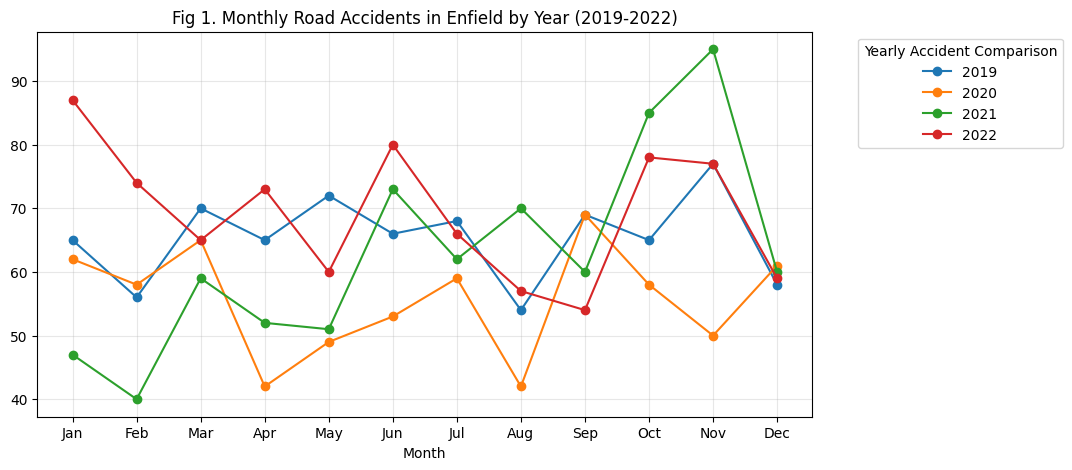

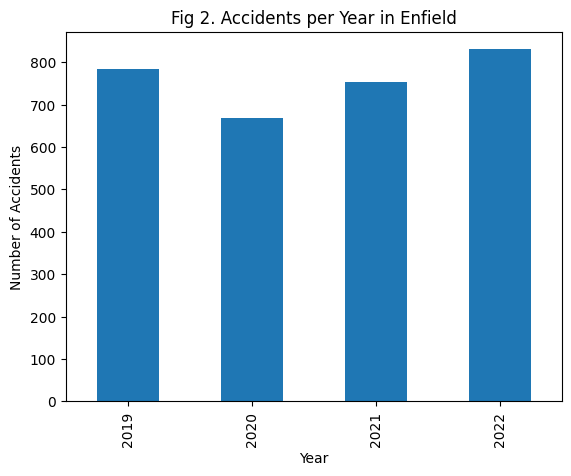

Year
2019    785
2020    668
2021    754
2022    830
Name: count, dtype: int64


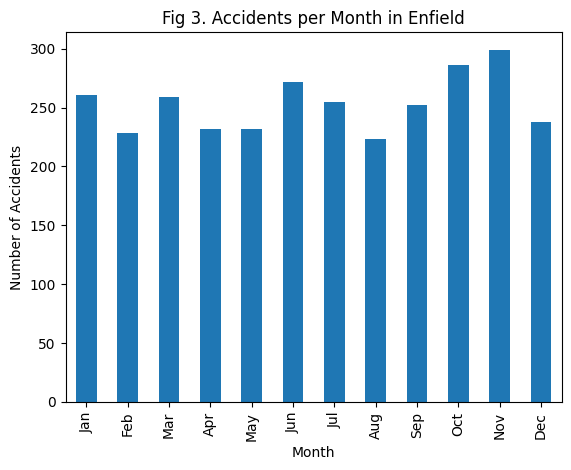

Month
1     261
2     228
3     259
4     232
5     232
6     272
7     255
8     223
9     252
10    286
11    299
12    238
Name: count, dtype: int64


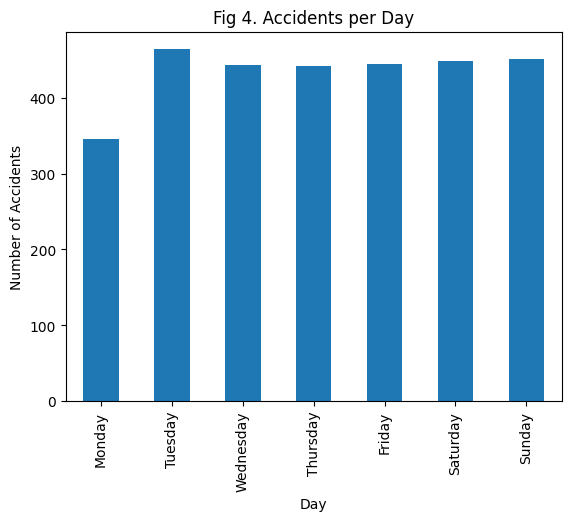

DayOfTheWeek
0    345
1    464
2    443
3    442
4    444
5    448
6    451
Name: count, dtype: int64


In [56]:
monthly_Enfielddata = Enfield_df.groupby(['Year', 'Month']).size()
monthly_Enfielddata = monthly_Enfielddata.unstack(level=0)

monthly_Enfielddata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Fig 1. Monthly Road Accidents in Enfield by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# Accidents per year
accidents_per_year = Enfield_df['Year'].value_counts().sort_index()

#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Fig 2. Accidents per Year in Enfield')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()
print(accidents_per_year)

#per Month
accidents_per_month = Enfield_df['Month'].value_counts().sort_index()
accidents_per_month.plot(kind='bar')
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Fig 3. Accidents per Month in Enfield')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()
print(accidents_per_month)

#accident per day
accidents_per_day = Enfield_df['DayOfTheWeek'].value_counts().sort_index()
accidents_per_day.plot(kind='bar')
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Fig 4. Accidents per Day')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()
print(accidents_per_day)

<hr>
<h3>INSIGHTS : Fig 1. Monthly Road Accidents in Enfield by Year (2019-2022)</h3>
<h3>In the Year 2019 & 2021, Accidents mostly happen in the Month of November.<br>
    In the Year 2020, Accidents mostly happen in the month of September.<br>
    In the Year 2022, Accidents mostly happen in the month of January.<br><br>
    From the year 2019 to 2022, The Year 2022 got the month who have the highest recorded accidents.<br>
    From the year 2019 to 2022, The Year 2021 got the month who have the lowest recorded accident.</h3>
<hr>
<h3>INSIGHTS : Fig 2. Accidents per Year in Enfield</h3>
<h3>The Year 2022 got the highest record with 830 accidents.<br>
    The Year 2020 got the lowest record with 668 accidents.</h3>
<hr>
<h3>INSIGHTS : Fig 3. Accidents per Month in Enfield</h3>
<h3>From the combined accident records per Month, November got the highest record with 299.<br>
    From the combined accident records per Month, February got the lowest record with 228.</h3>
<hr>
<h3>INSIGHTS : Fig 4. Accidents per Day in Enfield</h3>
<h3>From the combined accident records per Day, Tuesday got the highest record with 464.<br>
    From the combined accident records per Day, Monday got the lowest record with 345.</h3>
<hr>

<h2>29. Preston</h2>

In [57]:
Preston_df = accident[accident['District Area'] == 'Preston']
Preston_locations  = list(zip(Preston_df['Latitude'], Preston_df['Longitude']))
Preston_map = folium.Map(location=[Preston_df['Latitude'].mean(), Preston_df['Longitude'].mean()], zoom_start=10)
HeatMap(Preston_locations).add_to(Preston_map)
Preston_map.save('bolton_heatmap.html')  
Preston_map

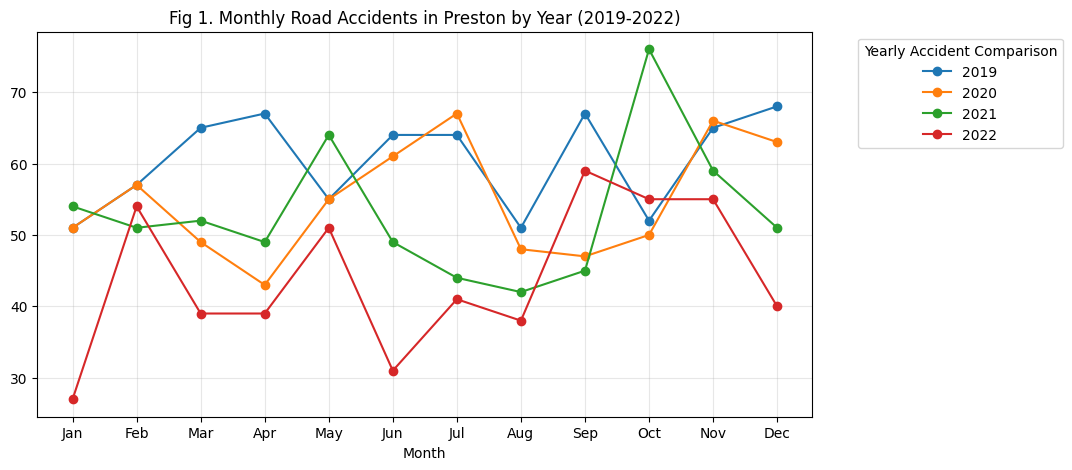

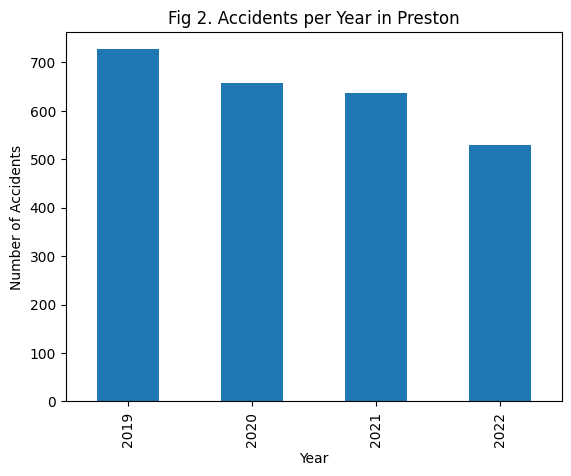

Year
2019    726
2020    657
2021    636
2022    529
Name: count, dtype: int64


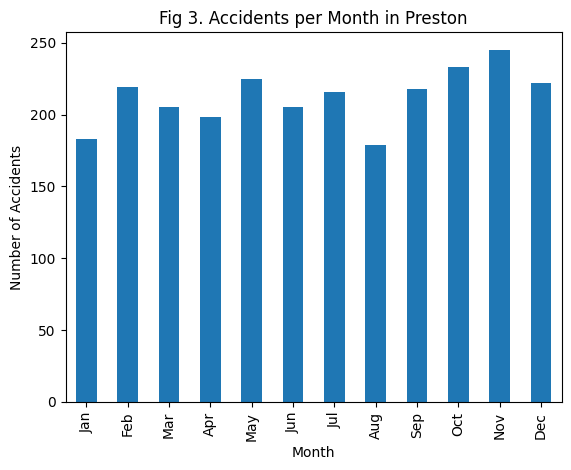

Month
1     183
2     219
3     205
4     198
5     225
6     205
7     216
8     179
9     218
10    233
11    245
12    222
Name: count, dtype: int64


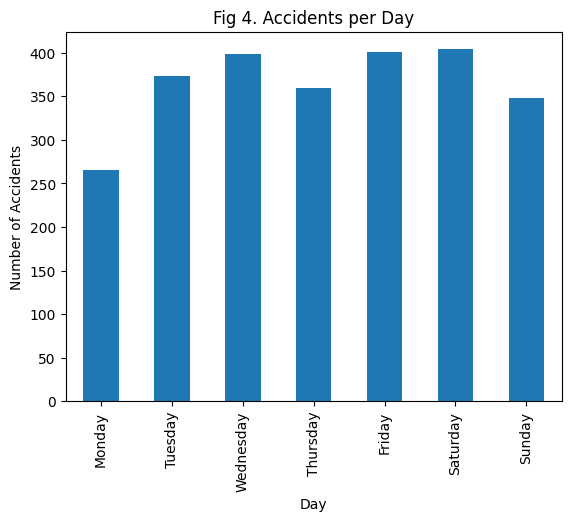

DayOfTheWeek
0    265
1    373
2    398
3    359
4    401
5    404
6    348
Name: count, dtype: int64


In [58]:
monthly_Prestondata = Preston_df.groupby(['Year', 'Month']).size()
monthly_Prestondata = monthly_Prestondata.unstack(level=0)

monthly_Prestondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Fig 1. Monthly Road Accidents in Preston by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# Accidents per year
accidents_per_year = Preston_df['Year'].value_counts().sort_index()

#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Fig 2. Accidents per Year in Preston')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()
print(accidents_per_year)

#per Month
accidents_per_month = Preston_df['Month'].value_counts().sort_index()
accidents_per_month.plot(kind='bar')
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Fig 3. Accidents per Month in Preston')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()
print(accidents_per_month)

#accident per day
accidents_per_day = Preston_df['DayOfTheWeek'].value_counts().sort_index()
accidents_per_day.plot(kind='bar')
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Fig 4. Accidents per Day')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()
print(accidents_per_day)

<hr>
<h3>INSIGHTS : Fig 1. Monthly Road Accidents in Preston by Year (2019-2022)</h3>
<h3>In the Year 2019, Accidents mostly happen in the month of December.<br>
    In the Year 2020, Accidents mostly happen in the month of July.<br>
    In the Year 2021, Accidents mostly happen in the month of October.<br>
    In the Year 2022, Accidents mostly happen in the month of September.<br><br>
    From the year 2019 to 2022, The Year 2021 got the month who have the highest recorded accidents.<br>
    From the year 2019 to 2022, The Year 2022 got the month who have the lowest recorded accident.</h3>
<hr>
<h3>INSIGHTS : Fig 2. Accidents per Year in Preston</h3>
<h3>The Year 2019 got the highest record with 726 accidents.<br>
    The Year 2022 got the lowest record with 529 accidents.</h3>
<hr>
<h3>INSIGHTS : Fig 3. Accidents per Month in Preston</h3>
<h3>From the combined accident records per Month, November got the highest record with 245.<br>
    From the combined accident records per Month, August got the lowest record with 179.</h3>
<hr>
<h3>INSIGHTS : Fig 4. Accidents per Day in Preston</h3>
<h3>From the combined accident records per Day, Saturday got the highest record with 404.<br>
    From the combined accident records per Day, Monday got the lowest record with 265.</h3>
<hr>

<h2>30. Eastleigh</h2>

In [59]:
Eastleigh_df = accident[accident['District Area'] == 'Eastleigh']
Eastleigh_locations  = list(zip(Eastleigh_df['Latitude'], Eastleigh_df['Longitude']))
Eastleigh_map = folium.Map(location=[Eastleigh_df['Latitude'].mean(), Eastleigh_df['Longitude'].mean()], zoom_start=10)
HeatMap(Eastleigh_locations).add_to(Eastleigh_map)
Eastleigh_map.save('bolton_heatmap.html')  
Eastleigh_map

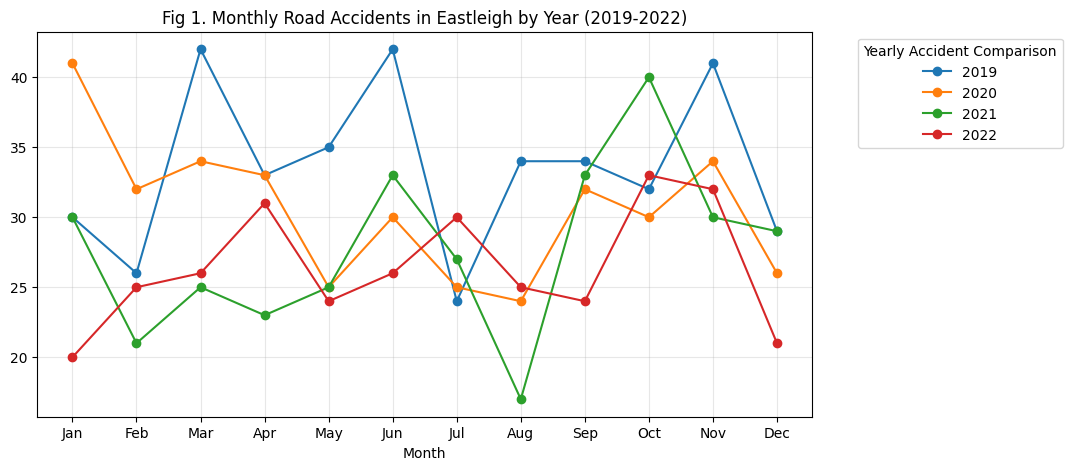

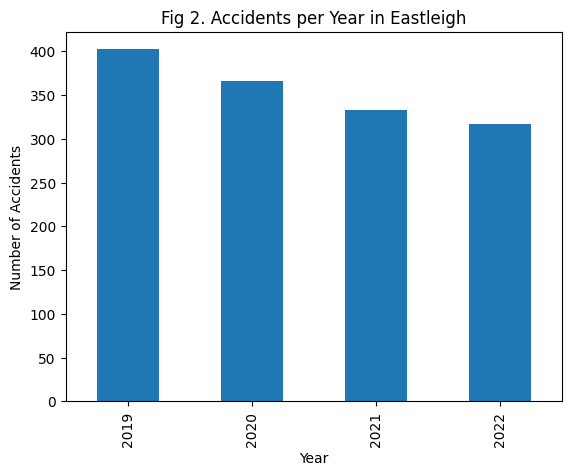

Year
2019    402
2020    366
2021    333
2022    317
Name: count, dtype: int64


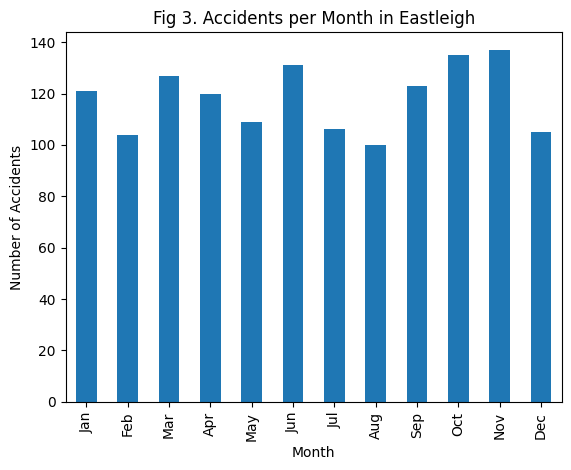

Month
1     121
2     104
3     127
4     120
5     109
6     131
7     106
8     100
9     123
10    135
11    137
12    105
Name: count, dtype: int64


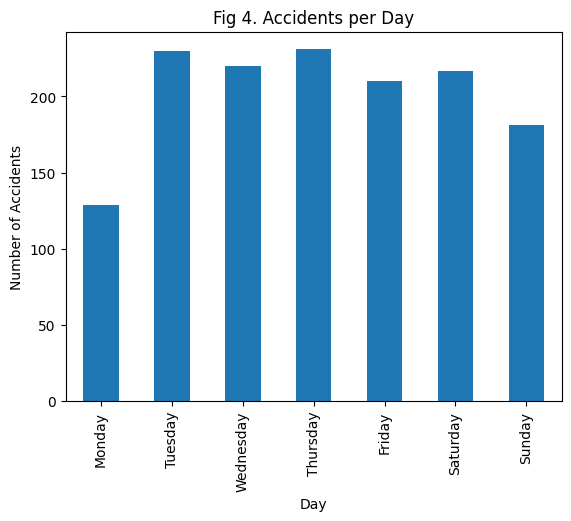

DayOfTheWeek
0    129
1    230
2    220
3    231
4    210
5    217
6    181
Name: count, dtype: int64


In [60]:
monthly_Eastleighdata = Eastleigh_df.groupby(['Year', 'Month']).size()
monthly_Eastleighdata = monthly_Eastleighdata.unstack(level=0)

monthly_Eastleighdata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Fig 1. Monthly Road Accidents in Eastleigh by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# Accidents per year
accidents_per_year = Eastleigh_df['Year'].value_counts().sort_index() 
accidents_per_year.plot(kind='bar')
plt.title('Fig 2. Accidents per Year in Eastleigh')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()
print(accidents_per_year)

#per Month
accidents_per_month = Eastleigh_df['Month'].value_counts().sort_index()
accidents_per_month.plot(kind='bar')
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Fig 3. Accidents per Month in Eastleigh')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()
print(accidents_per_month)

#accident per day
accidents_per_day = Eastleigh_df['DayOfTheWeek'].value_counts().sort_index()
accidents_per_day.plot(kind='bar')
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Fig 4. Accidents per Day')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()
print(accidents_per_day)

<hr>
<h3>INSIGHTS : Fig 1. Monthly Road Accidents in Eastleigh by Year (2019-2022)</h3>
<h3>In the Year 2019, Accidents mostly happen in the months of March & June.<br>
    In the Year 2020, Accidents mostly happen in the month of January.<br>
    In the Year 2021 & 2022, Accidents mostly happen in the month of October.<br><br>
    From the year 2019 to 2022, The Year 2019 got the month who have the highest recorded accidents.<br>
    From the year 2019 to 2022, The Year 2021 got the month who have the lowest recorded accident.</h3>
<hr>
<h3>INSIGHTS : Fig 2. Accidents per Year in Eastleigh</h3>
<h3>The Year 2019 got the highest record with 402 accidents.<br>
    The Year 2022 got the lowest record with 317 accidents.</h3>
<hr>
<h3>INSIGHTS : Fig 3. Accidents per Month in Eastleigh</h3>
<h3>From the combined accident records per Month, November got the highest record with 137.<br>
    From the combined accident records per Month, August got the lowest record with 100.</h3>
<hr>
<h3>INSIGHTS : Fig 4. Accidents per Day in Eastleigh</h3>
<h3>From the combined accident records per Day, Thursday got the highest record with 231.<br>
    From the combined accident records per Day, Monday got the lowest record with 129.</h3>
<hr>

<h2>31. Copeland</h2>

In [61]:
Copeland_df = accident[accident['District Area'] == 'Copeland']
Copeland_locations  = list(zip(Copeland_df['Latitude'], Copeland_df['Longitude']))
Copeland_map = folium.Map(location=[Copeland_df['Latitude'].mean(), Copeland_df['Longitude'].mean()], zoom_start=10)
HeatMap(Copeland_locations).add_to(Copeland_map)
Copeland_map.save('bolton_heatmap.html')  
Copeland_map

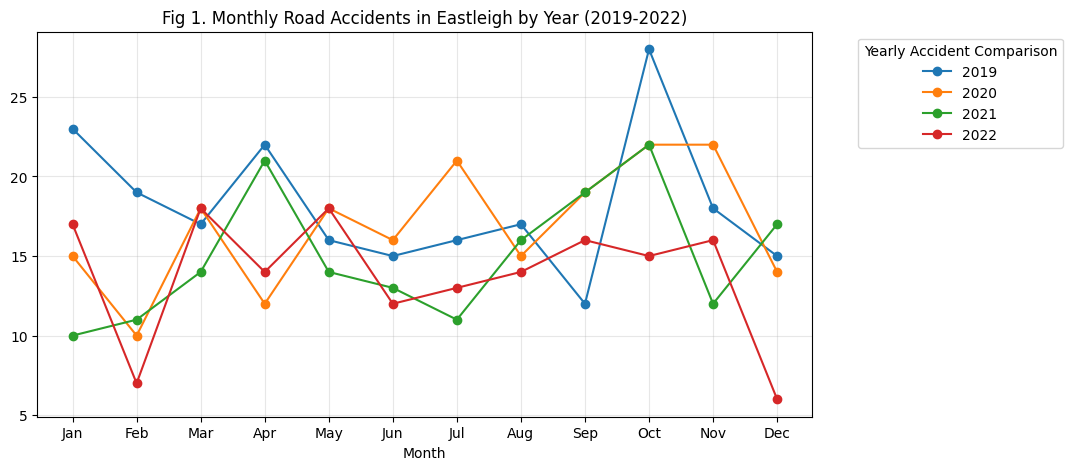

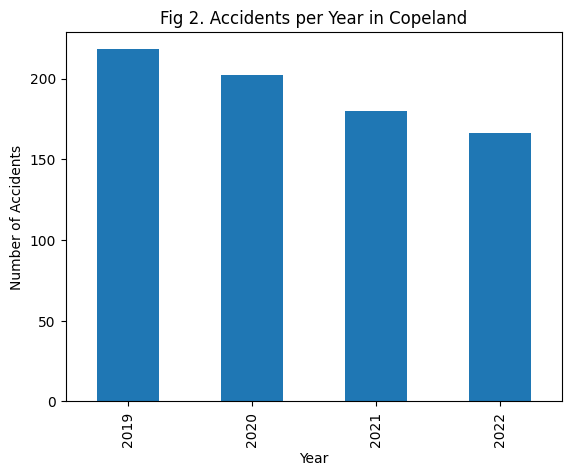

Year
2019    218
2020    202
2021    180
2022    166
Name: count, dtype: int64


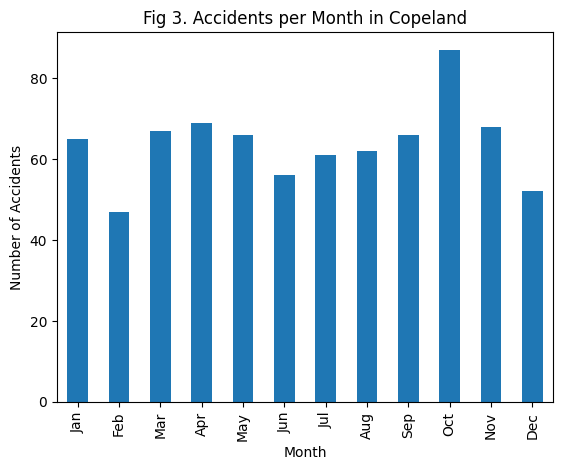

Month
1     65
2     47
3     67
4     69
5     66
6     56
7     61
8     62
9     66
10    87
11    68
12    52
Name: count, dtype: int64


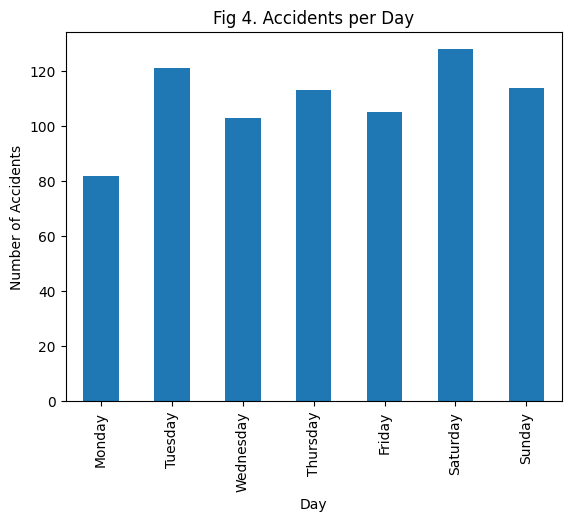

DayOfTheWeek
0     82
1    121
2    103
3    113
4    105
5    128
6    114
Name: count, dtype: int64


In [62]:
monthly_Copelanddata = Copeland_df.groupby(['Year', 'Month']).size()
monthly_Copelanddata = monthly_Copelanddata.unstack(level=0)

monthly_Copelanddata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Fig 1. Monthly Road Accidents in Eastleigh by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# Accidents per year
accidents_per_year = Copeland_df['Year'].value_counts().sort_index() 
accidents_per_year.plot(kind='bar')
plt.title('Fig 2. Accidents per Year in Copeland')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()
print(accidents_per_year)

#per Month
accidents_per_month = Copeland_df['Month'].value_counts().sort_index()
accidents_per_month.plot(kind='bar')
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Fig 3. Accidents per Month in Copeland')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()
print(accidents_per_month)

#accident per day
accidents_per_day = Copeland_df['DayOfTheWeek'].value_counts().sort_index()
accidents_per_day.plot(kind='bar')
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Fig 4. Accidents per Day')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()
print(accidents_per_day)

<hr>
<h3>INSIGHTS : Fig 1. Monthly Road Accidents in Copeland by Year (2019-2022)</h3>
<h3>In the Year 2019 & 2021, Accidents mostly happen in the months of October.<br>
    In the Year 2020, Accidents mostly happen in the month of October & November<br>
    In the Year 2022, Accidents mostly happen in the month of March & May.<br><br>
    From the year 2019 to 2022, The Year 2019 got the month who have the highest recorded accidents.<br>
    From the year 2019 to 2022, The Year 2022 got the month who have the lowest recorded accident.</h3>
<hr>
<h3>INSIGHTS : Fig 2. Accidents per Year in Copeland</h3>
<h3>The Year 2019 got the highest record with 218 accidents.<br>
    The Year 2022 got the lowest record with 166 accidents.</h3>
<hr>
<h3>INSIGHTS : Fig 3. Accidents per Month in Copeland</h3>
<h3>From the combined accident records per Month, October got the highest record with 87.<br>
    From the combined accident records per Month, February got the lowest record with 27.</h3>
<hr>
<h3>INSIGHTS : Fig 4. Accidents per Day in Copeland</h3>
<h3>From the combined accident records per Day, Saturday got the highest record with 128.<br>
    From the combined accident records per Day, Monday got the lowest record with 82.</h3>
<hr>

<h2>32. Hackney</h2>

In [63]:
Hackney_df = accident[accident['District Area'] == 'Hackney']
Hackney_locations  = list(zip(Hackney_df['Latitude'], Hackney_df['Longitude']))
Hackney_map = folium.Map(location=[Hackney_df['Latitude'].mean(), Hackney_df['Longitude'].mean()], zoom_start=10)
HeatMap(Hackney_locations).add_to(Hackney_map)
Hackney_map.save('bolton_heatmap.html')  
Hackney_map

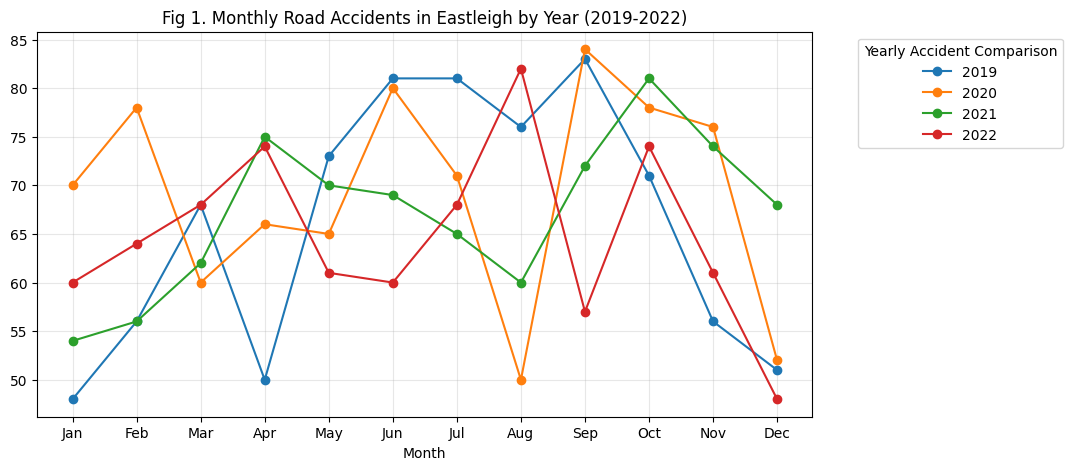

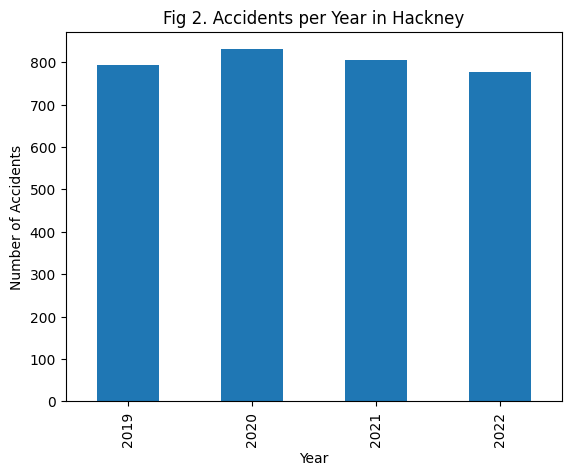

Year
2019    794
2020    830
2021    806
2022    777
Name: count, dtype: int64


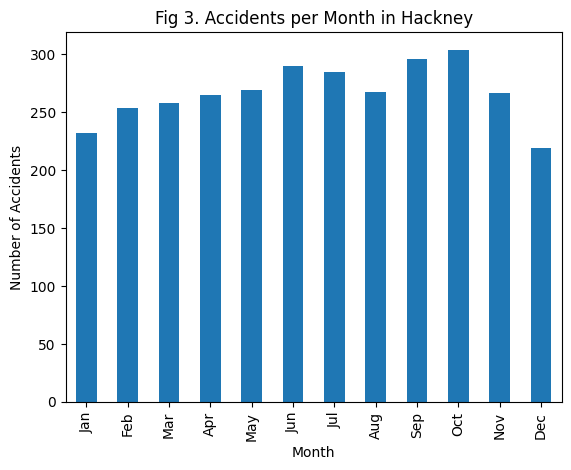

Month
1     232
2     254
3     258
4     265
5     269
6     290
7     285
8     268
9     296
10    304
11    267
12    219
Name: count, dtype: int64


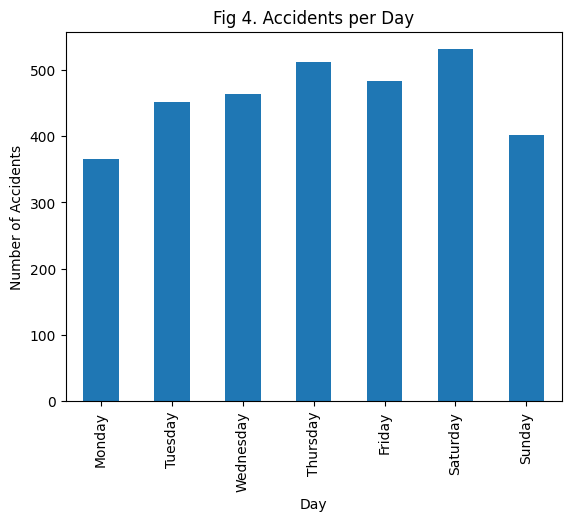

DayOfTheWeek
0    365
1    452
2    464
3    511
4    483
5    531
6    401
Name: count, dtype: int64


In [64]:
monthly_Hackneydata = Hackney_df.groupby(['Year', 'Month']).size()
monthly_Hackneydata = monthly_Hackneydata.unstack(level=0)

monthly_Hackneydata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Fig 1. Monthly Road Accidents in Eastleigh by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# Accidents per year
accidents_per_year = Hackney_df['Year'].value_counts().sort_index() 
accidents_per_year.plot(kind='bar')
plt.title('Fig 2. Accidents per Year in Hackney')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()
print(accidents_per_year)

#per Month
accidents_per_month = Hackney_df['Month'].value_counts().sort_index()
accidents_per_month.plot(kind='bar')
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Fig 3. Accidents per Month in Hackney')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()
print(accidents_per_month)

#accident per day
accidents_per_day = Hackney_df['DayOfTheWeek'].value_counts().sort_index()
accidents_per_day.plot(kind='bar')
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Fig 4. Accidents per Day')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.show()
print(accidents_per_day)

<hr>
<h3>INSIGHTS : Fig 1. Monthly Road Accidents in Hackney by Year (2019-2022)</h3>
<h3>In the Year 2019 & 2020, Accidents mostly happen in the months of September.<br>
    In the Year 2021, Accidents mostly happen in the month of October.<br>
    In the Year 2022, Accidents mostly happen in the month of August.<br><br>
    From the year 2019 to 2022, The Year 2020 got the month who have the highest recorded accidents.<br>
    From the year 2019 to 2022, The Year 2019 & 2022 got the month who have the lowest recorded accident.</h3>
<hr>
<h3>INSIGHTS : Fig 2. Accidents per Year in Hackney</h3>
<h3>The Year 2020 got the highest record with 830 accidents.<br>
    The Year 2022 got the lowest record with 777 accidents.</h3>
<hr>
<h3>INSIGHTS : Fig 3. Accidents per Month in Hackney</h3>
<h3>From the combined accident records per Month, October got the highest record with 304.<br>
    From the combined accident records per Month, December got the lowest record with 219.</h3>
<hr>
<h3>INSIGHTS : Fig 4. Accidents per Day in Hackney</h3>
<h3>From the combined accident records per Day, Saturday got the highest record with 513.<br>
    From the combined accident records per Day, Monday got the lowest record with 365.</h3>
<hr>

<h1>THANK YOU!</h1>